## IMPORT LIBRARY

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, cross_val_predict
from collections import defaultdict
from sklearn.metrics import ConfusionMatrixDisplay

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## LOAD DATASET

In [2]:
df = pd.read_csv('drive/MyDrive/data_hiv/hiv.csv')
df.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,948,2,48,89.8128,0,0,0,100,0,0,...,0,1,0,1,0,422,477,566,324,0
1,1002,3,61,49.4424,0,0,0,90,0,1,...,1,3,0,1,0,162,218,392,564,1
2,961,3,45,88.4520,0,1,1,90,0,1,...,1,3,0,1,1,326,274,2063,1893,0
3,1166,3,47,85.2768,0,1,0,100,0,1,...,1,3,0,1,0,287,394,1590,966,0
4,1090,0,43,66.6792,0,1,0,100,0,1,...,1,3,0,0,0,504,353,870,782,0


## NORMALISASI DATA

In [3]:
X = df.drop('infected', axis=1)
y = df['infected']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nData before normalization:")
X.head()


Data before normalization:


,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820
0,948,2,48,89.8128,0,0,0,100,0,0,...,0,0,1,0,1,0,422,477,566,324
1,1002,3,61,49.4424,0,0,0,90,0,1,...,0,1,3,0,1,0,162,218,392,564
2,961,3,45,88.4520,0,1,1,90,0,1,...,1,1,3,0,1,1,326,274,2063,1893
3,1166,3,47,85.2768,0,1,0,100,0,1,...,1,1,3,0,1,0,287,394,1590,966
4,1090,0,43,66.6792,0,1,0,100,0,1,...,1,1,3,0,0,0,504,353,870,782


In [4]:
print("\nData after normalization:")
pd.DataFrame(X_scaled, columns=X.columns).head()


Data after normalization:


,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820
0,0.235799,0.424960,1.464542,1.107649,-0.303123,-1.396547,-0.388893,0.771836,-0.149888,-1.106116,...,-2.193741,-1.189210,-1.090177,-0.457338,0.575371,-0.754541,0.603131,0.730927,-0.876151,-1.374260
1,0.420600,1.311779,2.957595,-1.936862,-0.303123,-1.396547,-0.388893,-0.923192,-0.149888,0.904064,...,-2.193741,0.840894,1.134907,-0.457338,0.575371,-0.754541,-1.590108,-1.060207,-1.238586,-0.834779
2,0.280288,1.311779,1.119991,1.005025,-0.303123,0.716052,2.571400,-0.923192,-0.149888,0.904064,...,0.455842,0.840894,1.134907,-0.457338,0.575371,1.325309,-0.206680,-0.672935,2.242044,2.152597
3,0.981848,1.311779,1.349692,0.765569,-0.303123,0.716052,-0.388893,0.771836,-0.149888,0.904064,...,0.455842,0.840894,1.134907,-0.457338,0.575371,-0.754541,-0.535666,0.156934,1.256802,0.068852
4,0.721757,-1.348678,0.890291,-0.636959,-0.303123,0.716052,-0.388893,0.771836,-0.149888,0.904064,...,0.455842,0.840894,1.134907,-0.457338,-1.738009,-0.754541,1.294845,-0.126605,-0.242930,-0.344750


# SKENARIO 1

## SPLIT DATA

In [5]:
test_size = 0.1
print(f"=== Skenario 1: Split Data 90:10 ===")

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=test_size, random_state=42, stratify=y)

print("\nShape of training data:", X_train.shape)
print("Shape of testing data:", X_test.shape)

train_class_counts = y_train.value_counts()
test_class_counts = y_test.value_counts()

print("\nJumlah Data Training dan Testing berdasarkan Kelas:")
print(f"{'Kelas':<15}{'Jumlah Data Training':<20}{'Jumlah Data Testing'}")
print(f"Infected:       {train_class_counts.get(1, 0):<20}{test_class_counts.get(1, 0)}")
print(f"Non-Infected:   {train_class_counts.get(0, 0):<20}{test_class_counts.get(0, 0)}")

=== Skenario 1: Split Data 90:10 ===

Shape of training data: (1925, 22)
Shape of testing data: (214, 22)

Jumlah Data Training dan Testing berdasarkan Kelas:
Kelas          Jumlah Data TrainingJumlah Data Testing
Infected:       469                 52
Non-Infected:   1456                162


## PCA

Eigenvalue

In [6]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print("\nEigenvalues:")
print(pca.explained_variance_)


Eigenvalues:
[3.59242355 2.27083252 2.0501587  1.83293561 1.5988731  1.38105029
 1.06252316 1.03662209 1.01299304 0.95655299 0.86265348 0.82050176
 0.77254735 0.65719312 0.53820601 0.43897367 0.39387511 0.22225027
 0.19345758 0.14594409 0.09963407 0.0452054 ]


Variance Ratio

In [7]:
print("\nExplained variance ratio:")
print(pca.explained_variance_ratio_)

explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(explained_variance_ratio >= 0.95) + 1
print(f"Number of components to retain 95% variance: {num_components}")


Explained variance ratio:
[0.16340037 0.10328817 0.09325089 0.08337056 0.07272429 0.06281668
 0.04832856 0.04715046 0.0460757  0.04350854 0.03923755 0.03732029
 0.0351391  0.02989224 0.02448015 0.01996659 0.0179153  0.01010899
 0.00879936 0.00663823 0.00453183 0.00205615]
Number of components to retain 95% variance: 17


Principal Component (Data Training)

In [8]:
pca = PCA(n_components=num_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print("\nPrincipal Components (training data):")
pd.DataFrame(X_train_pca).head()


Principal Components (training data):


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-2.407723,0.605532,-0.988089,1.417869,-0.065956,-0.061050,0.914423,-1.111903,-0.411975,-0.642109,-0.059325,-0.660062,0.673198,0.739544,0.675139,-0.221536,0.141136
1,1.584889,0.349586,1.007580,-1.062565,-2.110960,-0.850360,0.651330,-0.769246,0.455696,0.168775,-0.154110,0.582627,0.347445,-0.106707,0.560232,-0.182983,-0.671783
2,1.759147,-0.405273,0.384584,-1.698490,3.084650,0.965863,0.271201,-0.333033,0.462475,-1.257351,-0.913058,-0.107861,-0.476346,0.673352,0.163867,-0.137771,-0.384942
3,-1.995672,-0.351292,1.782287,0.161388,0.748434,0.854486,-0.697557,0.246559,0.183545,-0.506061,-0.857530,-0.078782,-0.000462,-0.878818,0.253677,-0.414460,0.181828
4,3.033830,1.431987,-2.188331,0.207258,0.452249,2.167190,0.108225,1.349159,-0.790445,0.739348,-1.439391,1.630954,-0.580576,1.622589,-0.537132,0.039528,1.593847


## UNDERSAMPLING

In [9]:
rus = RandomUnderSampler(random_state=42)
X_train_balanced, y_train_balanced = rus.fit_resample(X_train_pca, y_train)

print("\nShape of training data after undersampling:", X_train_balanced.shape)
print("Class distribution after undersampling:")
print(pd.Series(y_train_balanced).value_counts())

undersampled_train_data = pd.DataFrame(X_train_balanced, columns=[f'PC{i+1}' for i in range(X_train_balanced.shape[1])])
undersampled_train_data['infected'] = y_train_balanced.values
undersampled_train_data.to_csv('data_training_skenario1.csv', index=False)

test_data_pca = pd.DataFrame(X_test_pca, columns=[f'PC{i+1}' for i in range(X_test_pca.shape[1])])
test_data_pca['infected'] = y_test.values
test_data_pca.to_csv('data_testing_skenario1.csv', index=False)


Shape of training data after undersampling: (938, 17)
Class distribution after undersampling:
infected
0    469
1    469
Name: count, dtype: int64


## SVM

In [10]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10]}
grid_search = GridSearchCV(
    SVC(kernel='rbf', random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring=['accuracy', 'precision', 'recall', 'f1'],
    refit='accuracy'
)

grid_search.fit(X_train_balanced, y_train_balanced)

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10]},
             refit='accuracy',
             scoring=['accuracy', 'precision', 'recall', 'f1'])

Rata-rata Evaluasi Berdasarkan Nilai C

In [11]:
results = pd.DataFrame(grid_search.cv_results_)

if {'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1'}.issubset(results.columns):
    avg_metrics_by_C = results.groupby('param_C').agg({
        'mean_test_accuracy': 'mean',
        'mean_test_precision': 'mean',
        'mean_test_recall': 'mean',
        'mean_test_f1': 'mean'
    })
    for C, row in avg_metrics_by_C.iterrows():
        print(f"C = {C:.1f}: "
              f"Akurasi = {row['mean_test_accuracy'] * 100:.2f}%, "
              f"Precision = {row['mean_test_precision'] * 100:.2f}%, "
              f"Recall = {row['mean_test_recall'] * 100:.2f}%, "
              f"F1 Score = {row['mean_test_f1'] * 100:.2f}%")
else:
    print("Kolom yang diperlukan untuk evaluasi rata-rata berdasarkan nilai C tidak ditemukan.")

C = 0.1: Akurasi = 59.56%, Precision = 51.47%, Recall = 81.34%, F1 Score = 61.95%
C = 1.0: Akurasi = 63.90%, Precision = 59.90%, Recall = 83.95%, F1 Score = 68.07%
C = 10.0: Akurasi = 63.47%, Precision = 58.91%, Recall = 83.24%, F1 Score = 67.50%
C = 100.0: Akurasi = 63.33%, Precision = 58.68%, Recall = 83.24%, F1 Score = 67.39%


Rata-rata Evaluasi Berdasarkan Nilai Gamma

In [12]:
if {'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1'}.issubset(results.columns):
    avg_metrics_by_gamma = results.groupby('param_gamma').agg({
        'mean_test_accuracy': 'mean',
        'mean_test_precision': 'mean',
        'mean_test_recall': 'mean',
        'mean_test_f1': 'mean'
    })
    for gamma, row in avg_metrics_by_gamma.iterrows():
        print(f"Gamma (γ) = {gamma:.2f}: "
              f"Akurasi = {row['mean_test_accuracy'] * 100:.2f}%, "
              f"Precision = {row['mean_test_precision'] * 100:.2f}%, "
              f"Recall = {row['mean_test_recall'] * 100:.2f}%, "
              f"F1 Score = {row['mean_test_f1'] * 100:.2f}%")
else:
    print("Kolom yang diperlukan untuk evaluasi rata-rata berdasarkan nilai Gamma tidak ditemukan.")

Gamma (γ) = 0.10: Akurasi = 78.84%, Precision = 78.88%, Recall = 79.54%, F1 Score = 79.02%
Gamma (γ) = 1.00: Akurasi = 58.02%, Precision = 52.41%, Recall = 89.40%, F1 Score = 65.98%
Gamma (γ) = 10.00: Akurasi = 50.82%, Precision = 40.42%, Recall = 79.89%, F1 Score = 53.68%


Hasil Evaluasi Per Kombinasi Hyperparameter

In [13]:
formatted_results = results[['param_C', 'param_gamma', 'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1']].copy()
formatted_results.columns = ['C (C)', 'Gamma (γ)', 'Akurasi', 'Precision', 'Recall', 'F1-Score']
formatted_results[['Akurasi', 'Precision', 'Recall', 'F1-Score']] *= 100

print(tabulate(formatted_results, headers='keys', tablefmt='grid', showindex=False))

+---------+-------------+-----------+-------------+----------+------------+
|   C (C) |   Gamma (γ) |   Akurasi |   Precision |   Recall |   F1-Score |
+=========+=============+===========+=============+==========+============+
|     0.1 |         0.1 |   76.6526 |     73.317  |  84.2347 |    78.305  |
+---------+-------------+-----------+-------------+----------+------------+
|     0.1 |         1   |   51.9143 |     41.0313 |  79.7872 |    54.1766 |
+---------+-------------+-----------+-------------+----------+------------+
|     0.1 |        10   |   50.1058 |     40.0535 |  80      |    53.3806 |
+---------+-------------+-----------+-------------+----------+------------+
|     1   |         0.1 |   80.9193 |     83.2423 |  77.8243 |    80.3189 |
+---------+-------------+-----------+-------------+----------+------------+
|     1   |         1   |   60.1274 |     56.133  |  94.0311 |    70.2662 |
+---------+-------------+-----------+-------------+----------+------------+
|     1   | 

Rata-rata Evaluasi Model

In [14]:
avg_accuracy = results['mean_test_accuracy'].mean()
avg_precision = results['mean_test_precision'].mean()
avg_recall = results['mean_test_recall'].mean()
avg_f1 = results['mean_test_f1'].mean()

print(f"Akurasi: {avg_accuracy * 100:.2f}%, Precision: {avg_precision * 100:.2f}%, Recall: {avg_recall * 100:.2f}%, F1-Score: {avg_f1 * 100:.2f}%")

Akurasi: 62.56%, Precision: 57.24%, Recall: 82.95%, F1-Score: 66.23%


Hasil Training Skenario 1

In [15]:
best_accuracy = grid_search.best_score_ * 100
best_precision = results['mean_test_precision'][grid_search.best_index_] * 100
best_recall = results['mean_test_recall'][grid_search.best_index_] * 100
best_f1 = results['mean_test_f1'][grid_search.best_index_] * 100

skenario_1_results = {
    'Skenario': '90:10',
    'Accuracy': f"{best_accuracy:.2f}%",
    'Precision': f"{best_precision:.2f}%",
    'Recall': f"{best_recall:.2f}%",
    'F1-Score': f"{best_f1:.2f}%"
}
print(skenario_1_results)

{'Skenario': '90:10', 'Accuracy': '80.92%', 'Precision': '83.24%', 'Recall': '77.82%', 'F1-Score': '80.32%'}


Parameter Terbaik Berdasarkan Data Testing

In [16]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(best_params)

{'C': 1, 'gamma': 0.1}


Akurasi Model Terbaik pada Data Testing

In [17]:
y_pred_test = best_model.predict(X_test_pca)
accuracy_test = accuracy_score(y_test, y_pred_test) * 100
precision_test = precision_score(y_test, y_pred_test, zero_division=1) * 100
recall_test = recall_score(y_test, y_pred_test) * 100
f1_test = f1_score(y_test, y_pred_test) * 100

print(f"Accuracy: {accuracy_test:.2f}%, Precision: {precision_test:.2f}%, Recall: {recall_test:.2f}%, F1 Score: {f1_test:.2f}%")

Accuracy: 82.24%, Precision: 61.67%, Recall: 71.15%, F1 Score: 66.07%


## VISUALISASI DATA

In [18]:
y_pred_cv = cross_val_predict(grid_search.best_estimator_, X_train_balanced, y_train_balanced, cv=5)
conf_matrix_cv = confusion_matrix(y_train_balanced, y_pred_cv)

Confusion Matrix

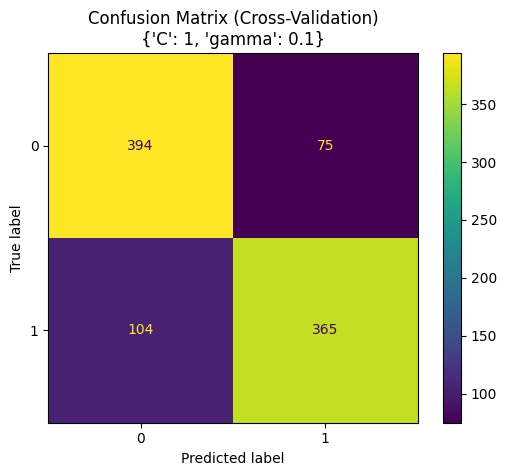

In [19]:
ConfusionMatrixDisplay(confusion_matrix=conf_matrix_cv, display_labels=best_model.classes_).plot()
plt.title(f"Confusion Matrix (Cross-Validation)\n{best_params}")
plt.show()

Confusion Matrix Untuk Model Terbaik Pada Data Testing

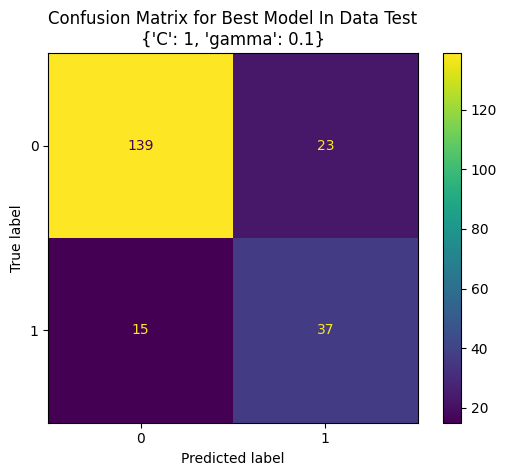

In [20]:
conf_matrix = confusion_matrix(y_test, y_pred_test)
ConfusionMatrixDisplay(conf_matrix, display_labels=best_model.classes_).plot()
plt.title(f"Confusion Matrix for Best Model In Data Test\n{best_params}")
plt.show()

Akurasi pada Setiap Percobaan Tuning Parameter

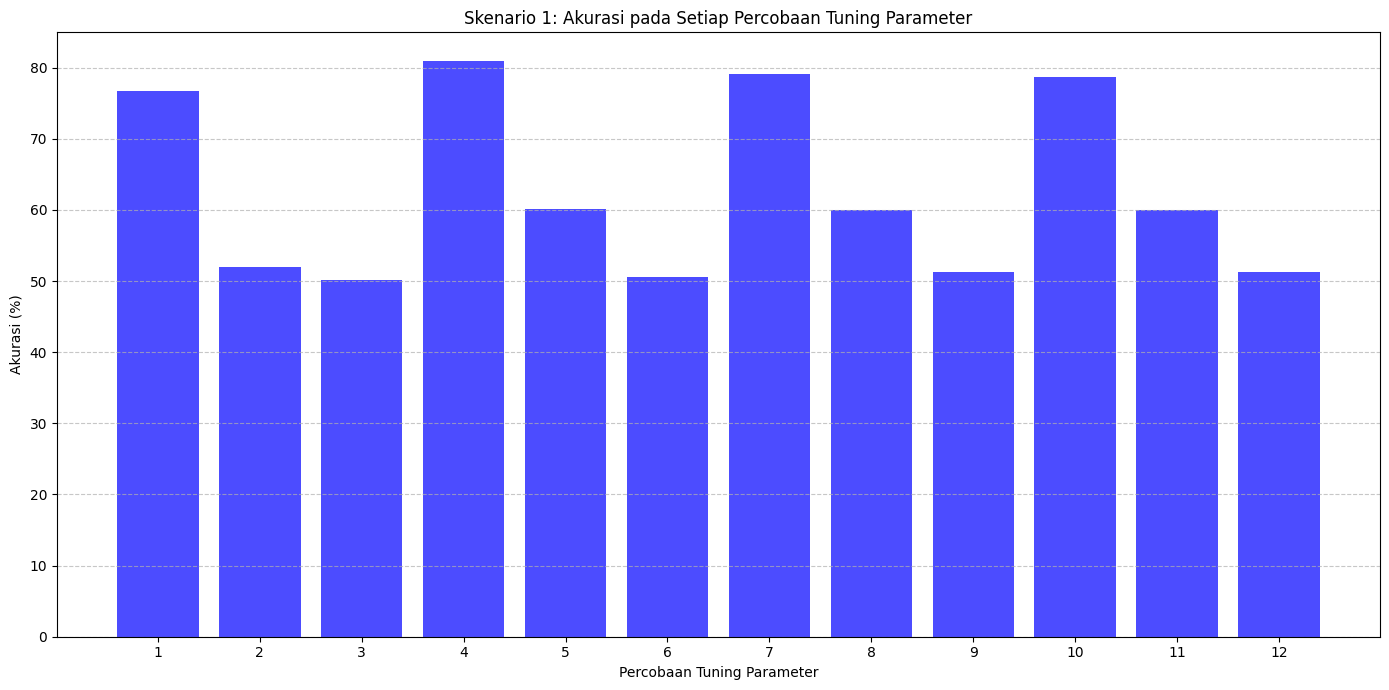

In [21]:
plt.figure(figsize=(14, 7))
plt.bar(range(1, len(formatted_results) + 1), formatted_results['Akurasi'], color='blue', alpha=0.7)
plt.xticks(range(1, len(formatted_results) + 1), range(1, len(formatted_results) + 1))
plt.title("Skenario 1: Akurasi pada Setiap Percobaan Tuning Parameter")
plt.xlabel("Percobaan Tuning Parameter")
plt.ylabel("Akurasi (%)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Presisi pada Setiap Percobaan Tuning Parameter

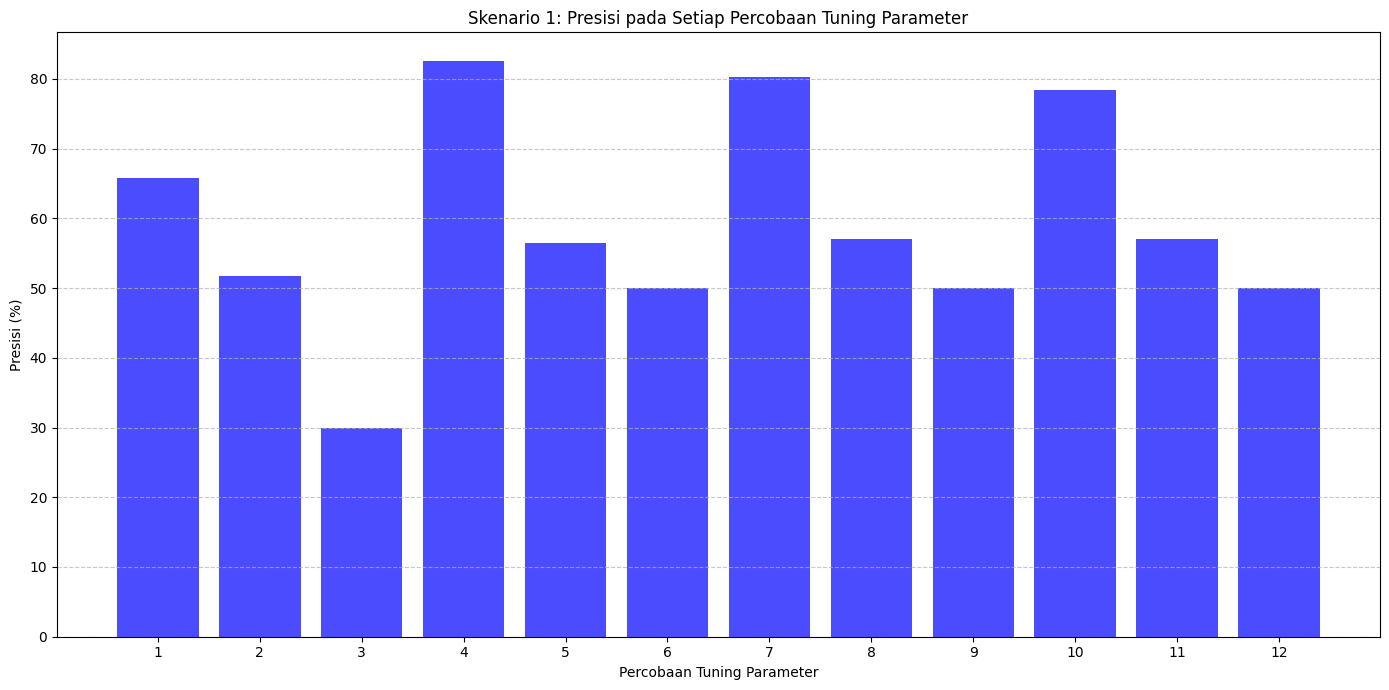

In [63]:
plt.figure(figsize=(14, 7))
plt.bar(range(1, len(formatted_results) + 1), formatted_results['Precision'], color='blue', alpha=0.7)
plt.xticks(range(1, len(formatted_results) + 1), range(1, len(formatted_results) + 1))
plt.title("Skenario 1: Presisi pada Setiap Percobaan Tuning Parameter")
plt.xlabel("Percobaan Tuning Parameter")
plt.ylabel("Presisi (%)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Recall pada Setiap Percobaan Tuning Parameter

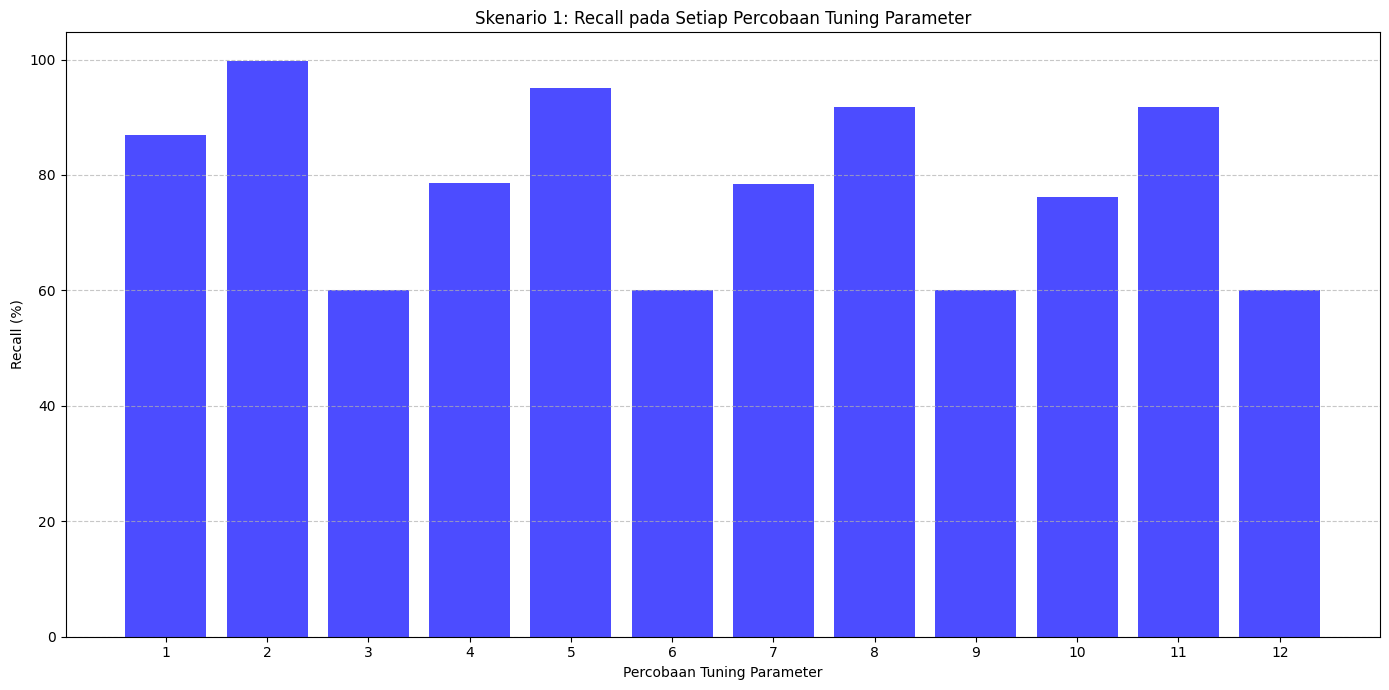

In [64]:
plt.figure(figsize=(14, 7))
plt.bar(range(1, len(formatted_results) + 1), formatted_results['Recall'], color='blue', alpha=0.7)
plt.xticks(range(1, len(formatted_results) + 1), range(1, len(formatted_results) + 1))
plt.title("Skenario 1: Recall pada Setiap Percobaan Tuning Parameter")
plt.xlabel("Percobaan Tuning Parameter")
plt.ylabel("Recall (%)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

F1-Score pada Setiap Percobaan Tuning Parameter

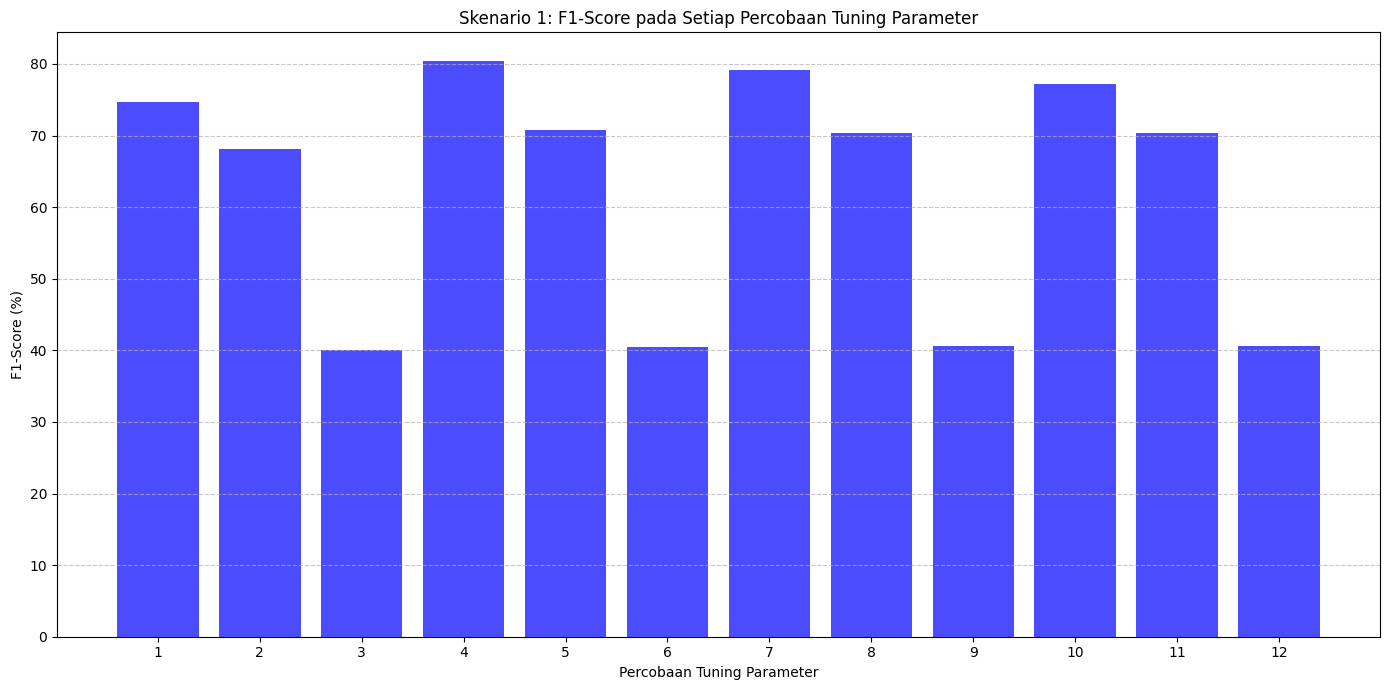

In [65]:
plt.figure(figsize=(14, 7))
plt.bar(range(1, len(formatted_results) + 1), formatted_results['F1-Score'], color='blue', alpha=0.7)
plt.xticks(range(1, len(formatted_results) + 1), range(1, len(formatted_results) + 1))
plt.title("Skenario 1: F1-Score pada Setiap Percobaan Tuning Parameter")
plt.xlabel("Percobaan Tuning Parameter")
plt.ylabel("F1-Score (%)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Evaluasi Metrik Tiap Percobaan Tuning Parameter

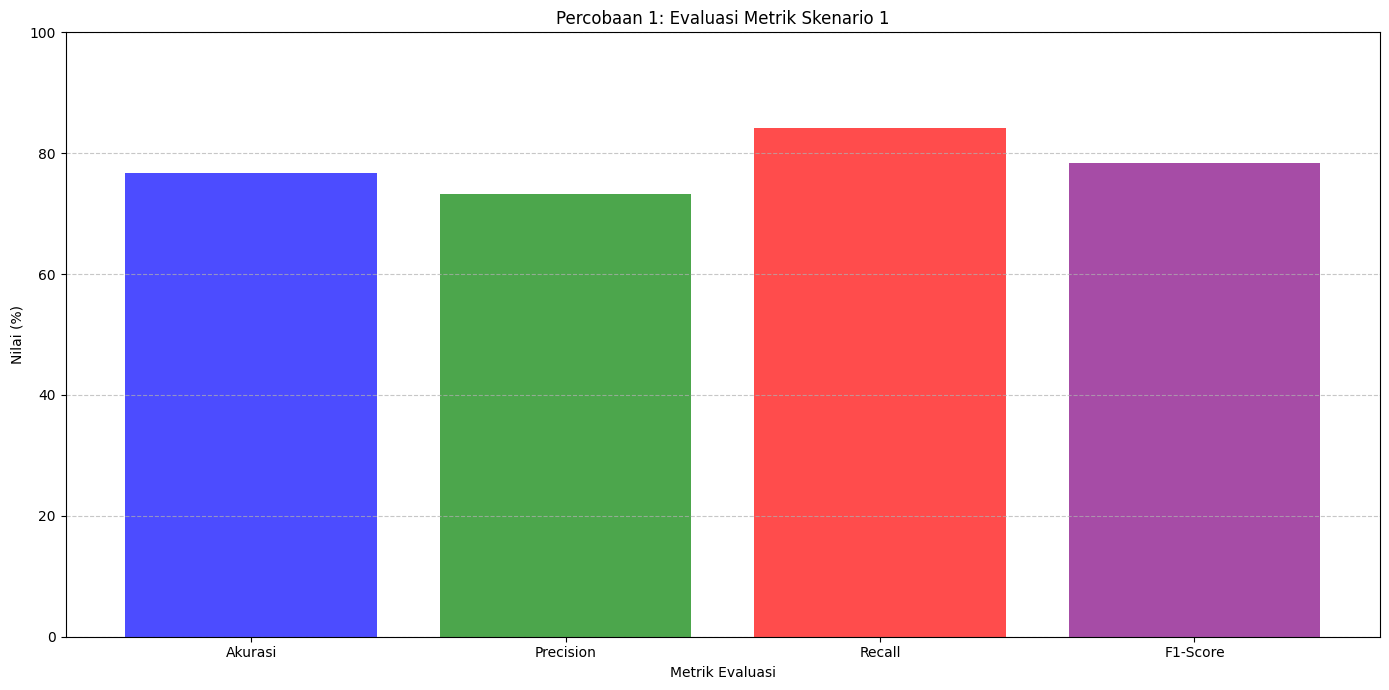

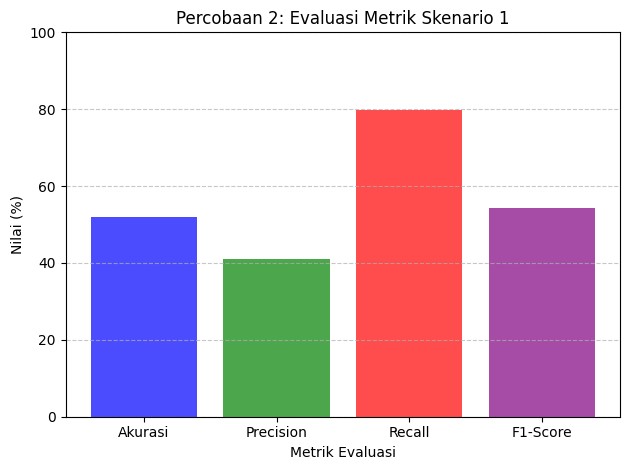

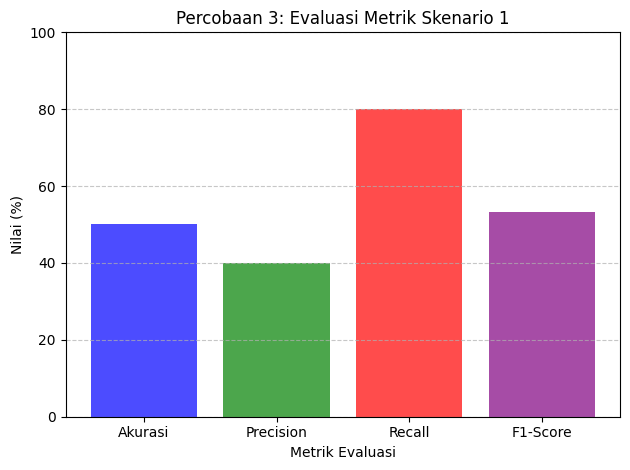

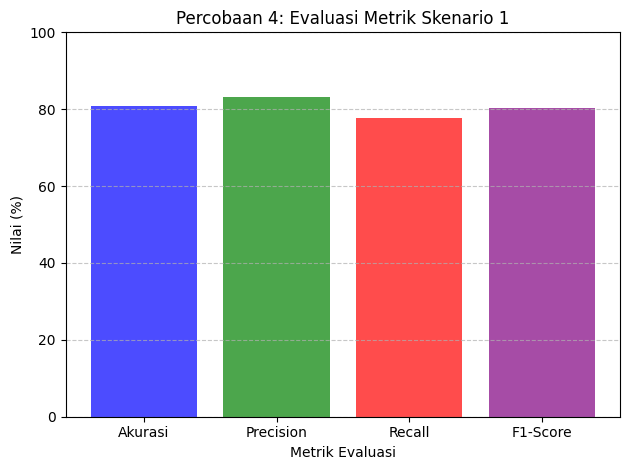

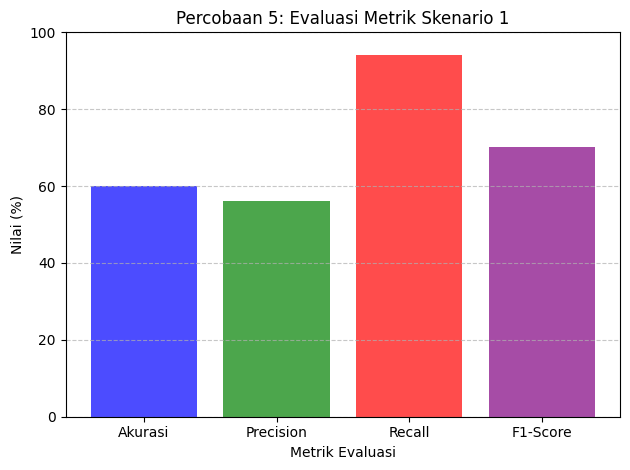

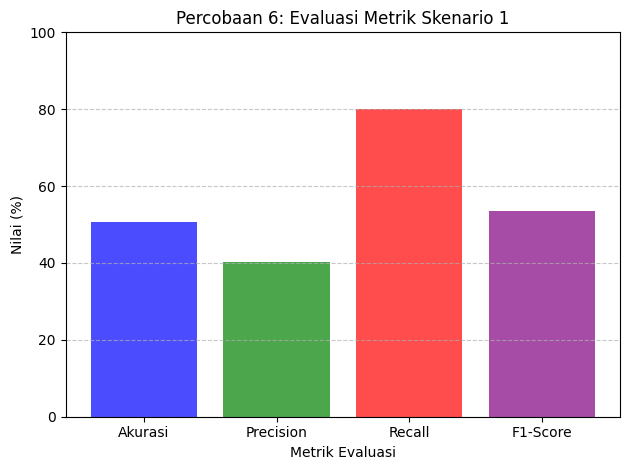

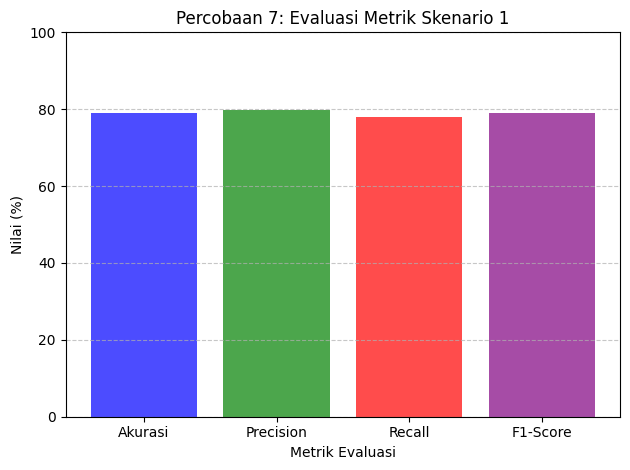

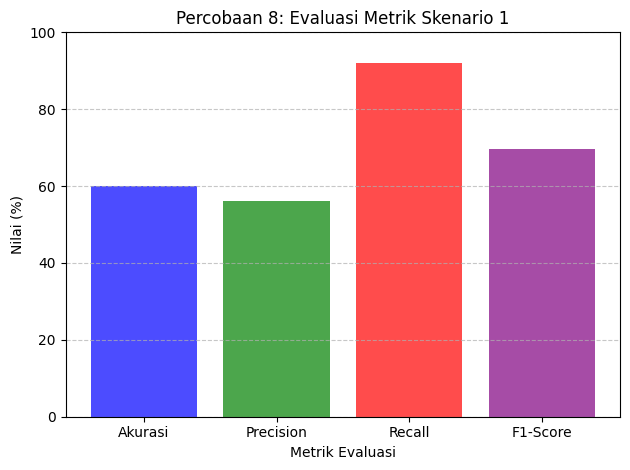

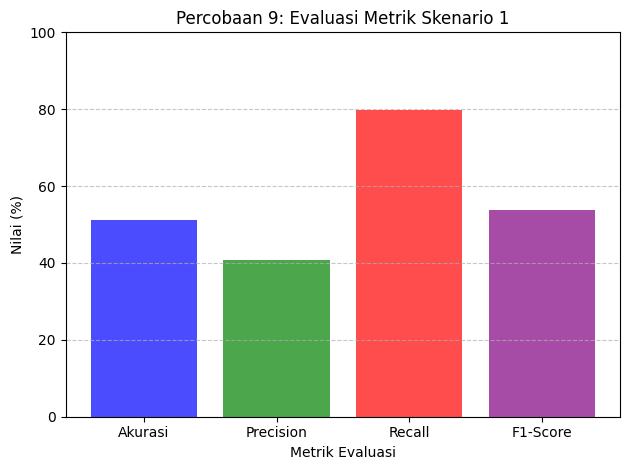

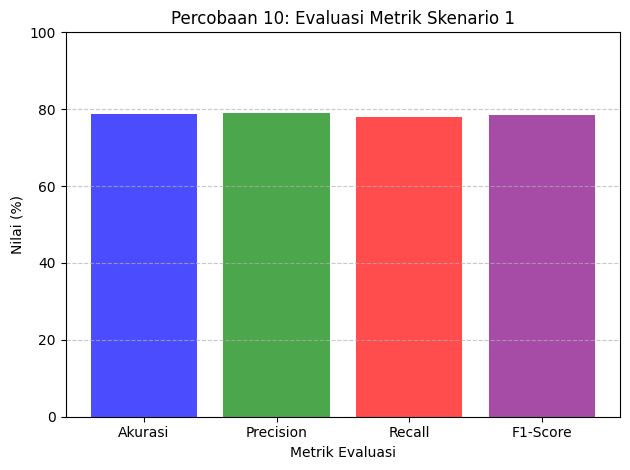

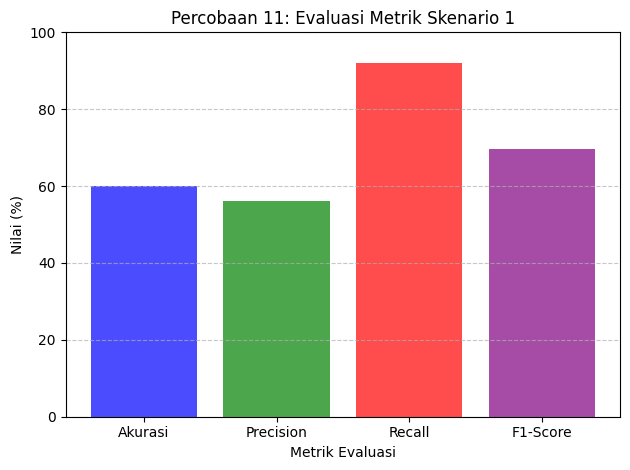

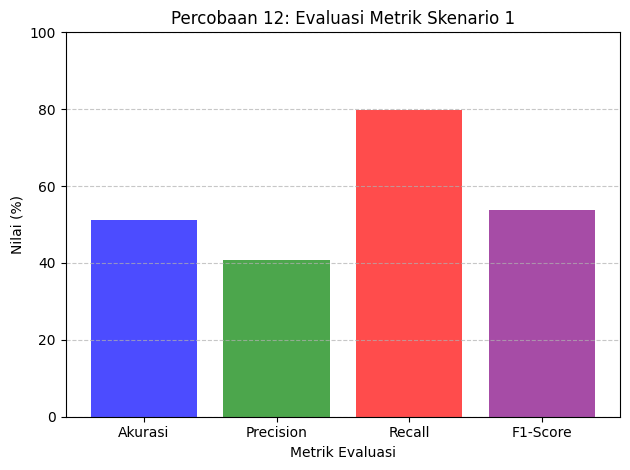

In [22]:
plt.figure(figsize=(14, 7))

for i in range(len(formatted_results)):
    metrics = [
        formatted_results.loc[i, 'Akurasi'],
        formatted_results.loc[i, 'Precision'],
        formatted_results.loc[i, 'Recall'],
        formatted_results.loc[i, 'F1-Score']
    ]

    labels = ['Akurasi', 'Precision', 'Recall', 'F1-Score']
    colors = ['blue', 'green', 'red', 'purple']

    plt.bar(labels, metrics, color=colors, alpha=0.7)
    plt.title(f"Percobaan {i+1}: Evaluasi Metrik Skenario 1")
    plt.xlabel("Metrik Evaluasi")
    plt.ylabel("Nilai (%)")
    plt.ylim(0, 100)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# SKENARIO 2

## SPLIT DATA

In [23]:
test_size = 0.2
print(f"=== Skenario 2: Split Data 80:20 ===")

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=test_size, random_state=42, stratify=y)

print("\nShape of training data:", X_train.shape)
print("Shape of testing data:", X_test.shape)

train_class_counts = y_train.value_counts()
test_class_counts = y_test.value_counts()

print("\nJumlah Data Training dan Testing berdasarkan Kelas:")
print(f"{'Kelas':<15}{'Jumlah Data Training':<20}{'Jumlah Data Testing'}")
print(f"Infected:       {train_class_counts.get(1, 0):<20}{test_class_counts.get(1, 0)}")
print(f"Non-Infected:   {train_class_counts.get(0, 0):<20}{test_class_counts.get(0, 0)}")

=== Skenario 2: Split Data 80:20 ===

Shape of training data: (1711, 22)
Shape of testing data: (428, 22)

Jumlah Data Training dan Testing berdasarkan Kelas:
Kelas          Jumlah Data TrainingJumlah Data Testing
Infected:       417                 104
Non-Infected:   1294                324


## PCA

Eigenvalue

In [24]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print("\nEigenvalues:")
print(pca.explained_variance_)


Eigenvalues:
[3.56722073 2.22634987 2.04350521 1.85956366 1.62609057 1.34144082
 1.07189168 1.01111461 1.00953054 0.9449031  0.86854418 0.81793373
 0.75272027 0.6606249  0.54952473 0.44334211 0.39175055 0.22123912
 0.19003616 0.14642481 0.09957587 0.04450824]


Variance Ratio

In [25]:
print("\nExplained variance ratio:")
print(pca.explained_variance_ratio_)

explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(explained_variance_ratio >= 0.95) + 1
print(f"Number of components to retain 95% variance: {num_components}")


Explained variance ratio:
[0.16297732 0.10171631 0.0933626  0.08495877 0.07429198 0.06128705
 0.04897203 0.04619528 0.0461229  0.04317024 0.03968159 0.03736933
 0.03438989 0.03018229 0.0251064  0.02025518 0.01789809 0.01010786
 0.00868227 0.00668978 0.00454937 0.00203347]
Number of components to retain 95% variance: 16


Principal Component (Data Training)

In [26]:
pca = PCA(n_components=num_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print("\nPrincipal Components (training data):")
pd.DataFrame(X_train_pca).head()


Principal Components (training data):


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,2.020339,-2.385532,-1.749919,-2.131623,-0.119323,-2.462811,-0.978018,0.748966,1.193643,-0.505140,0.125865,-0.914025,0.307536,0.155851,0.815807,0.448655
1,-1.916606,0.390932,1.475792,0.366513,0.624106,-0.059843,0.939717,-0.545801,-1.944649,-0.924236,1.012794,1.054119,0.360510,-0.092953,0.504305,-0.905840
2,-2.235201,0.180370,-0.101052,2.043200,-0.942733,0.383347,0.064719,-0.432922,0.166253,0.140198,0.136850,-0.109613,0.319585,-0.308795,-0.949255,0.218245
3,0.433861,1.245208,-1.631683,1.008756,-0.404869,0.216659,-0.652262,-0.662951,-0.600690,1.839566,0.308240,-0.959601,0.010108,1.685539,-0.802073,-0.236631
4,2.403991,0.771574,1.308187,-0.531510,-2.919630,-1.605738,-0.113995,0.439792,1.390832,-0.444421,-0.489601,-0.241401,-1.371018,0.194833,0.000450,0.068795


## UNDERSAMPLING

In [27]:
rus = RandomUnderSampler(random_state=42)
X_train_balanced, y_train_balanced = rus.fit_resample(X_train_pca, y_train)

print("\nShape of training data after undersampling:", X_train_balanced.shape)
print("Class distribution after undersampling:")
print(pd.Series(y_train_balanced).value_counts())

undersampled_train_data = pd.DataFrame(X_train_balanced, columns=[f'PC{i+1}' for i in range(X_train_balanced.shape[1])])
undersampled_train_data['infected'] = y_train_balanced.values
undersampled_train_data.to_csv('data_training_skenario2.csv', index=False)

test_data_pca = pd.DataFrame(X_test_pca, columns=[f'PC{i+1}' for i in range(X_test_pca.shape[1])])
test_data_pca['infected'] = y_test.values
test_data_pca.to_csv('data_testing_skenario2.csv', index=False)


Shape of training data after undersampling: (834, 16)
Class distribution after undersampling:
infected
0    417
1    417
Name: count, dtype: int64


## SVM

In [28]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10]}
grid_search = GridSearchCV(
    SVC(kernel='rbf', random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring=['accuracy', 'precision', 'recall', 'f1'],
    refit='accuracy'
)

grid_search.fit(X_train_balanced, y_train_balanced)

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10]},
             refit='accuracy',
             scoring=['accuracy', 'precision', 'recall', 'f1'])

Rata-rata Evaluasi Berdasarkan Nilai C

In [29]:
results = pd.DataFrame(grid_search.cv_results_)

if {'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1'}.issubset(results.columns):
    avg_metrics_by_C = results.groupby('param_C').agg({
        'mean_test_accuracy': 'mean',
        'mean_test_precision': 'mean',
        'mean_test_recall': 'mean',
        'mean_test_f1': 'mean'
    })
    for C, row in avg_metrics_by_C.iterrows():
        print(f"C = {C:.1f}: "
              f"Akurasi = {row['mean_test_accuracy'] * 100:.2f}%, "
              f"Precision = {row['mean_test_precision'] * 100:.2f}%, "
              f"Recall = {row['mean_test_recall'] * 100:.2f}%, "
              f"F1 Score = {row['mean_test_f1'] * 100:.2f}%")
else:
    print("Kolom yang diperlukan untuk evaluasi rata-rata berdasarkan nilai C tidak ditemukan.")

C = 0.1: Akurasi = 59.11%, Precision = 44.97%, Recall = 67.26%, F1 Score = 52.74%
C = 1.0: Akurasi = 62.67%, Precision = 62.47%, Recall = 76.28%, F1 Score = 62.84%
C = 10.0: Akurasi = 62.75%, Precision = 61.88%, Recall = 76.51%, F1 Score = 62.87%
C = 100.0: Akurasi = 62.87%, Precision = 62.10%, Recall = 76.51%, F1 Score = 62.96%


Rata-rata Evaluasi Berdasarkan Nilai Gamma

In [30]:
if {'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1'}.issubset(results.columns):
    avg_metrics_by_gamma = results.groupby('param_gamma').agg({
        'mean_test_accuracy': 'mean',
        'mean_test_precision': 'mean',
        'mean_test_recall': 'mean',
        'mean_test_f1': 'mean'
    })
    for gamma, row in avg_metrics_by_gamma.iterrows():
        print(f"Gamma (γ) = {gamma:.2f}: "
              f"Akurasi = {row['mean_test_accuracy'] * 100:.2f}%, "
              f"Precision = {row['mean_test_precision'] * 100:.2f}%, "
              f"Recall = {row['mean_test_recall'] * 100:.2f}%, "
              f"F1 Score = {row['mean_test_f1'] * 100:.2f}%")
else:
    print("Kolom yang diperlukan untuk evaluasi rata-rata berdasarkan nilai Gamma tidak ditemukan.")

Gamma (γ) = 0.10: Akurasi = 79.59%, Precision = 79.98%, Recall = 79.49%, F1 Score = 79.57%
Gamma (γ) = 1.00: Akurasi = 55.94%, Precision = 48.57%, Recall = 82.75%, F1 Score = 61.14%
Gamma (γ) = 10.00: Akurasi = 50.03%, Precision = 45.00%, Recall = 60.18%, F1 Score = 40.35%


Hasil Evaluasi Per Kombinasi Hyperparameter

In [31]:
formatted_results = results[['param_C', 'param_gamma', 'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1']].copy()
formatted_results.columns = ['C (C)', 'Gamma (γ)', 'Akurasi', 'Precision', 'Recall', 'F1-Score']
formatted_results[['Akurasi', 'Precision', 'Recall', 'F1-Score']] *= 100

print(tabulate(formatted_results, headers='keys', tablefmt='grid', showindex=False))

+---------+-------------+-----------+-------------+----------+------------+
|   C (C) |   Gamma (γ) |   Akurasi |   Precision |   Recall |   F1-Score |
+=========+=============+===========+=============+==========+============+
|     0.1 |         0.1 |   77.0969 |     74.7645 |  82.0224 |    78.1706 |
+---------+-------------+-----------+-------------+----------+------------+
|     0.1 |         1   |   50.4834 |     30.26   |  59.759  |    40.17   |
+---------+-------------+-----------+-------------+----------+------------+
|     0.1 |        10   |   49.7605 |     29.8802 |  60      |    39.8933 |
+---------+-------------+-----------+-------------+----------+------------+
|     1   |         0.1 |   80.6998 |     83.1343 |  77.2117 |    79.9695 |
+---------+-------------+-----------+-------------+----------+------------+
|     1   |         1   |   57.1965 |     54.2658 |  91.3769 |    68.0783 |
+---------+-------------+-----------+-------------+----------+------------+
|     1   | 

Rata-rata Evaluasi Model

In [32]:
avg_accuracy = results['mean_test_accuracy'].mean()
avg_precision = results['mean_test_precision'].mean()
avg_recall = results['mean_test_recall'].mean()
avg_f1 = results['mean_test_f1'].mean()

print(f"Akurasi: {avg_accuracy * 100:.2f}%, Precision: {avg_precision * 100:.2f}%, Recall: {avg_recall * 100:.2f}%, F1-Score: {avg_f1 * 100:.2f}%")

Akurasi: 61.85%, Precision: 57.85%, Recall: 74.14%, F1-Score: 60.35%


Hasil Training Skenario 2

In [33]:
best_accuracy = grid_search.best_score_ * 100
best_precision = results['mean_test_precision'][grid_search.best_index_] * 100
best_recall = results['mean_test_recall'][grid_search.best_index_] * 100
best_f1 = results['mean_test_f1'][grid_search.best_index_] * 100

skenario_2_results = {
    'Skenario': '80:20',
    'Accuracy': f"{best_accuracy:.2f}%",
    'Precision': f"{best_precision:.2f}%",
    'Recall': f"{best_recall:.2f}%",
    'F1-Score': f"{best_f1:.2f}%"
}

print(skenario_2_results)

{'Skenario': '80:20', 'Accuracy': '80.70%', 'Precision': '83.13%', 'Recall': '77.21%', 'F1-Score': '79.97%'}


Parameter Terbaik Berdasarkan Data Testing

In [34]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(best_params)

{'C': 1, 'gamma': 0.1}


Akurasi Model Terbaik pada Data Testing

In [35]:
y_pred_test = best_model.predict(X_test_pca)
accuracy_test = accuracy_score(y_test, y_pred_test) * 100
precision_test = precision_score(y_test, y_pred_test, zero_division=1) * 100
recall_test = recall_score(y_test, y_pred_test) * 100
f1_test = f1_score(y_test, y_pred_test) * 100

print(f"Accuracy: {accuracy_test:.2f}%, Precision: {precision_test:.2f}%, Recall: {recall_test:.2f}%, F1 Score: {f1_test:.2f}%")

Accuracy: 82.94%, Precision: 60.99%, Recall: 82.69%, F1 Score: 70.20%


## VISUALISASI DATA

In [36]:
y_pred_cv = cross_val_predict(grid_search.best_estimator_, X_train_balanced, y_train_balanced, cv=5)
conf_matrix_cv = confusion_matrix(y_train_balanced, y_pred_cv)

Confusion Matrix

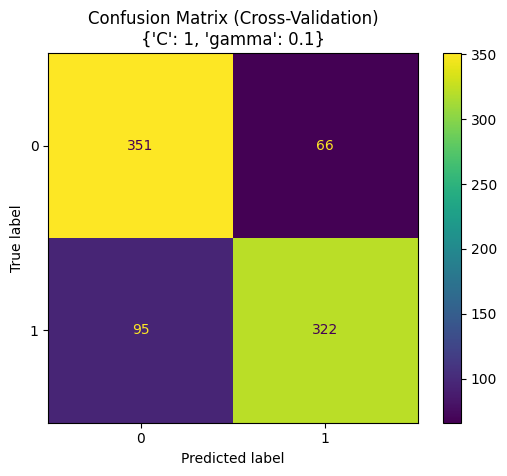

In [37]:
ConfusionMatrixDisplay(confusion_matrix=conf_matrix_cv, display_labels=best_model.classes_).plot()
plt.title(f"Confusion Matrix (Cross-Validation)\n{best_params}")
plt.show()

Confusion Matrix Untuk Model Terbaik Pada Data Testing

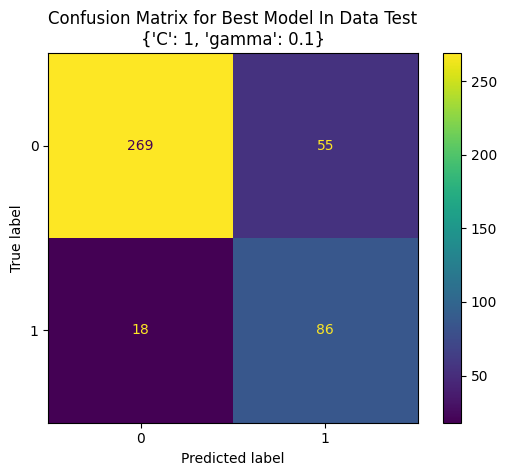

In [38]:
conf_matrix = confusion_matrix(y_test, y_pred_test)
ConfusionMatrixDisplay(conf_matrix, display_labels=best_model.classes_).plot()
plt.title(f"Confusion Matrix for Best Model In Data Test\n{best_params}")
plt.show()

Akurasi pada Setiap Percobaan Tuning Parameter

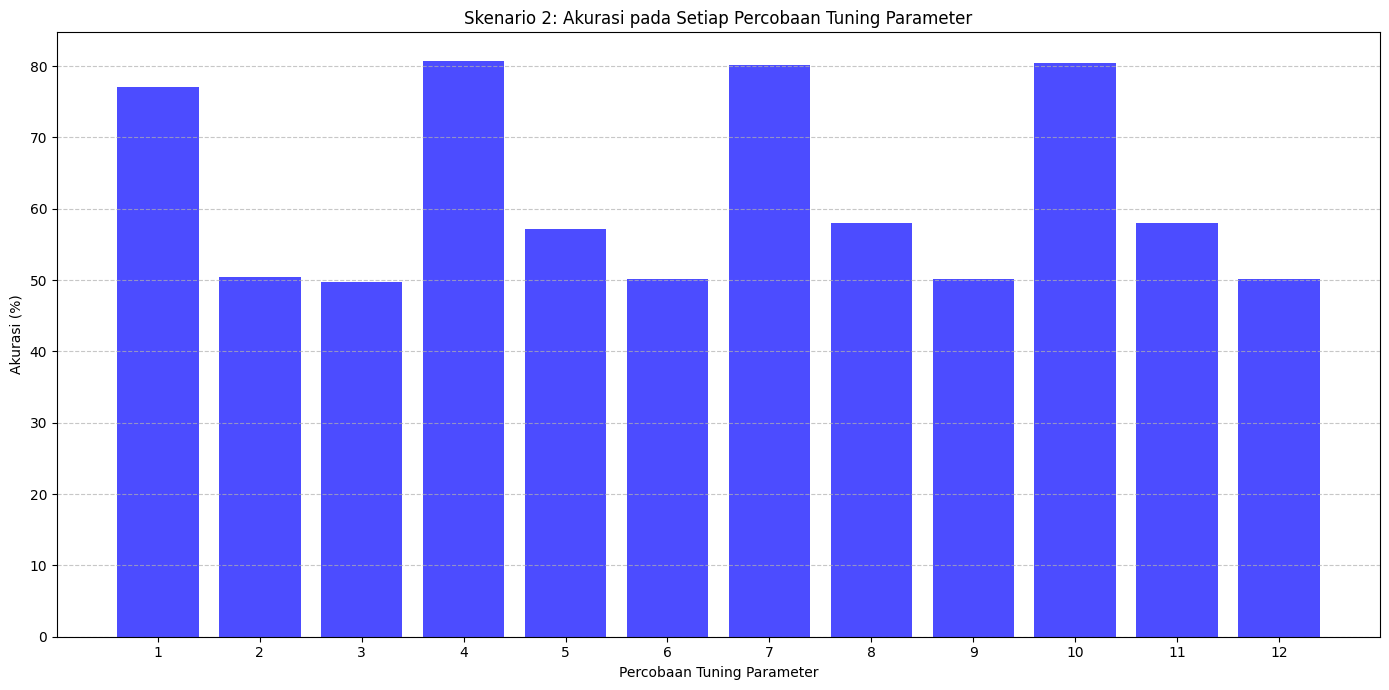

In [39]:
plt.figure(figsize=(14, 7))
plt.bar(range(1, len(formatted_results) + 1), formatted_results['Akurasi'], color='blue', alpha=0.7)
plt.xticks(range(1, len(formatted_results) + 1), range(1, len(formatted_results) + 1))
plt.title("Skenario 2: Akurasi pada Setiap Percobaan Tuning Parameter")
plt.xlabel("Percobaan Tuning Parameter")
plt.ylabel("Akurasi (%)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Presisi pada Setiap Percobaan Tuning Parameter

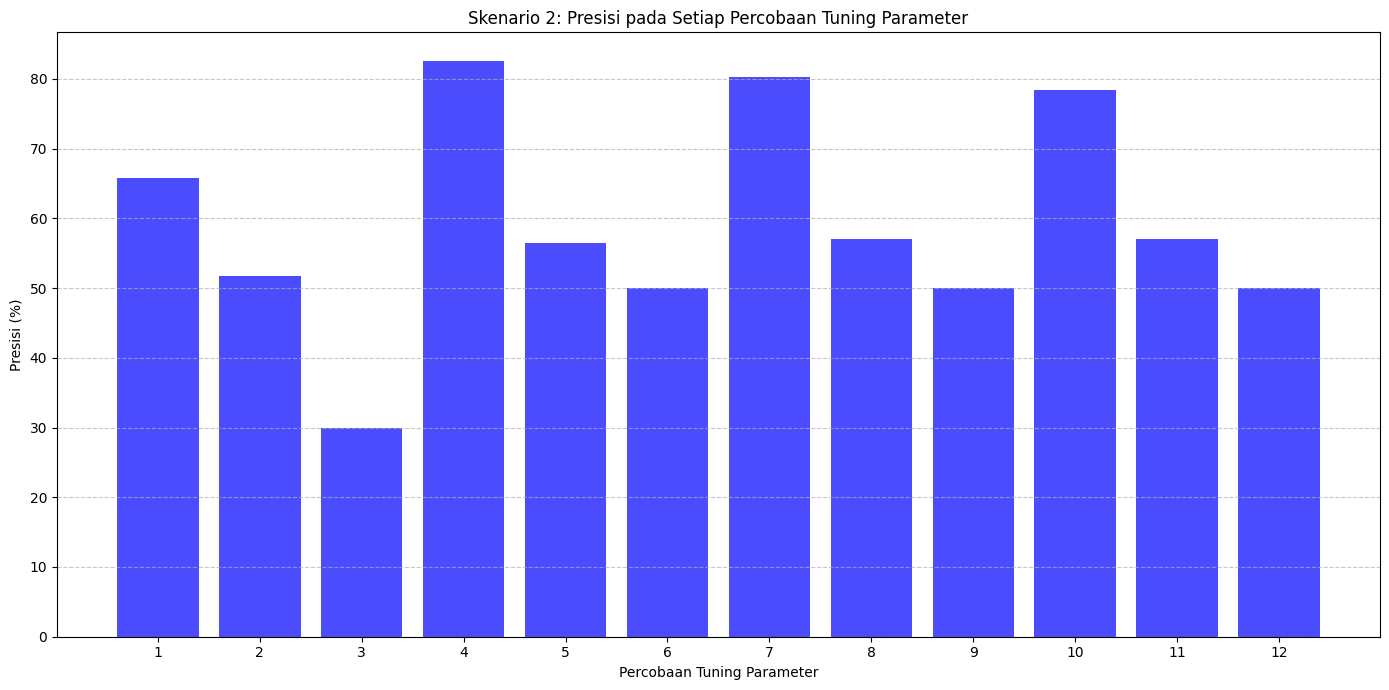

In [66]:
plt.figure(figsize=(14, 7))
plt.bar(range(1, len(formatted_results) + 1), formatted_results['Precision'], color='blue', alpha=0.7)
plt.xticks(range(1, len(formatted_results) + 1), range(1, len(formatted_results) + 1))
plt.title("Skenario 2: Presisi pada Setiap Percobaan Tuning Parameter")
plt.xlabel("Percobaan Tuning Parameter")
plt.ylabel("Presisi (%)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Recall pada Setiap Percobaan Tuning Parameter

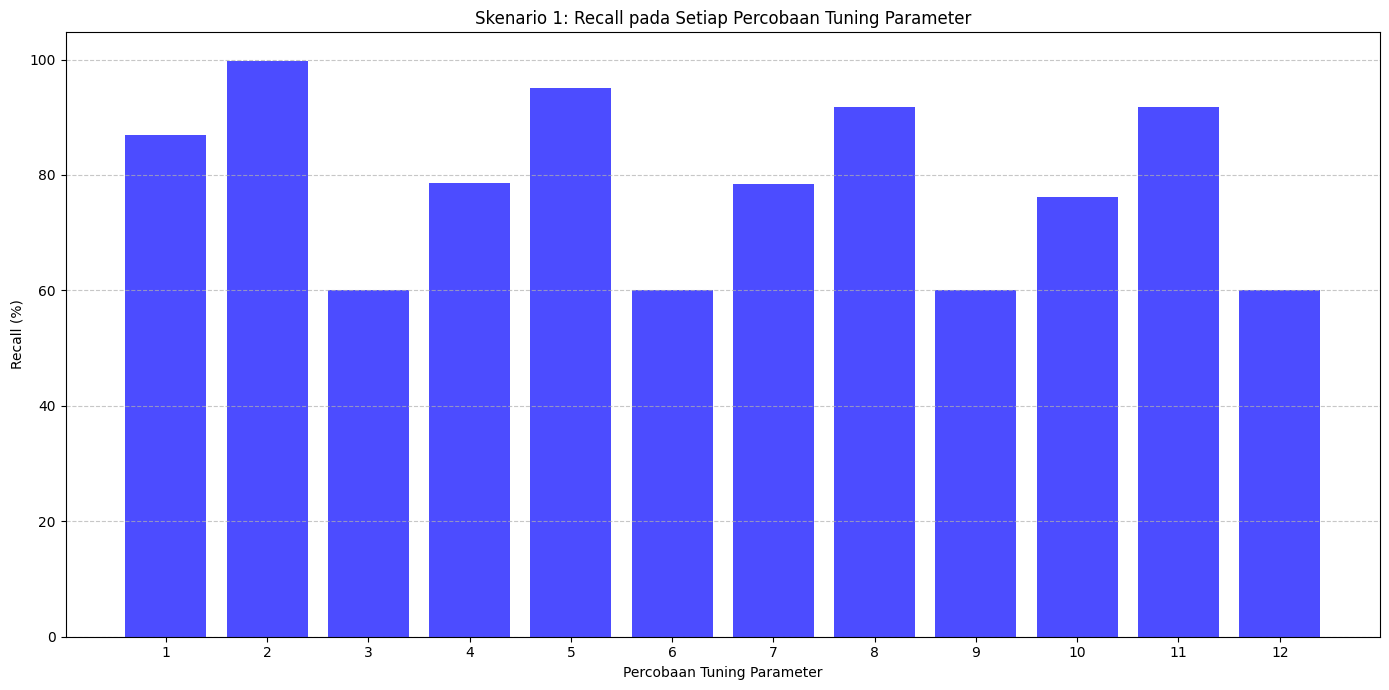

In [67]:
plt.figure(figsize=(14, 7))
plt.bar(range(1, len(formatted_results) + 1), formatted_results['Recall'], color='blue', alpha=0.7)
plt.xticks(range(1, len(formatted_results) + 1), range(1, len(formatted_results) + 1))
plt.title("Skenario 1: Recall pada Setiap Percobaan Tuning Parameter")
plt.xlabel("Percobaan Tuning Parameter")
plt.ylabel("Recall (%)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

F1-Score pada Setiap Percobaan Tuning Parameter

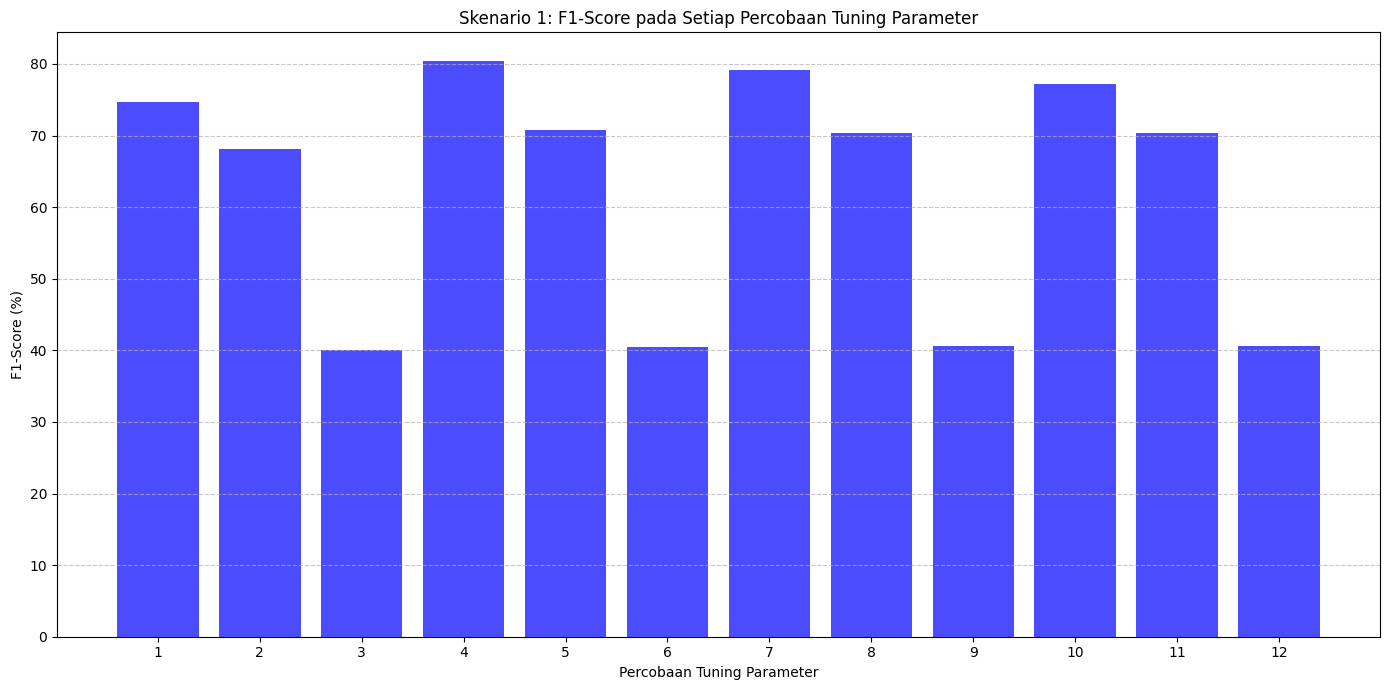

In [68]:
plt.figure(figsize=(14, 7))
plt.bar(range(1, len(formatted_results) + 1), formatted_results['F1-Score'], color='blue', alpha=0.7)
plt.xticks(range(1, len(formatted_results) + 1), range(1, len(formatted_results) + 1))
plt.title("Skenario 1: F1-Score pada Setiap Percobaan Tuning Parameter")
plt.xlabel("Percobaan Tuning Parameter")
plt.ylabel("F1-Score (%)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Evaluasi Metrik Tiap Percobaan Tuning Parameter

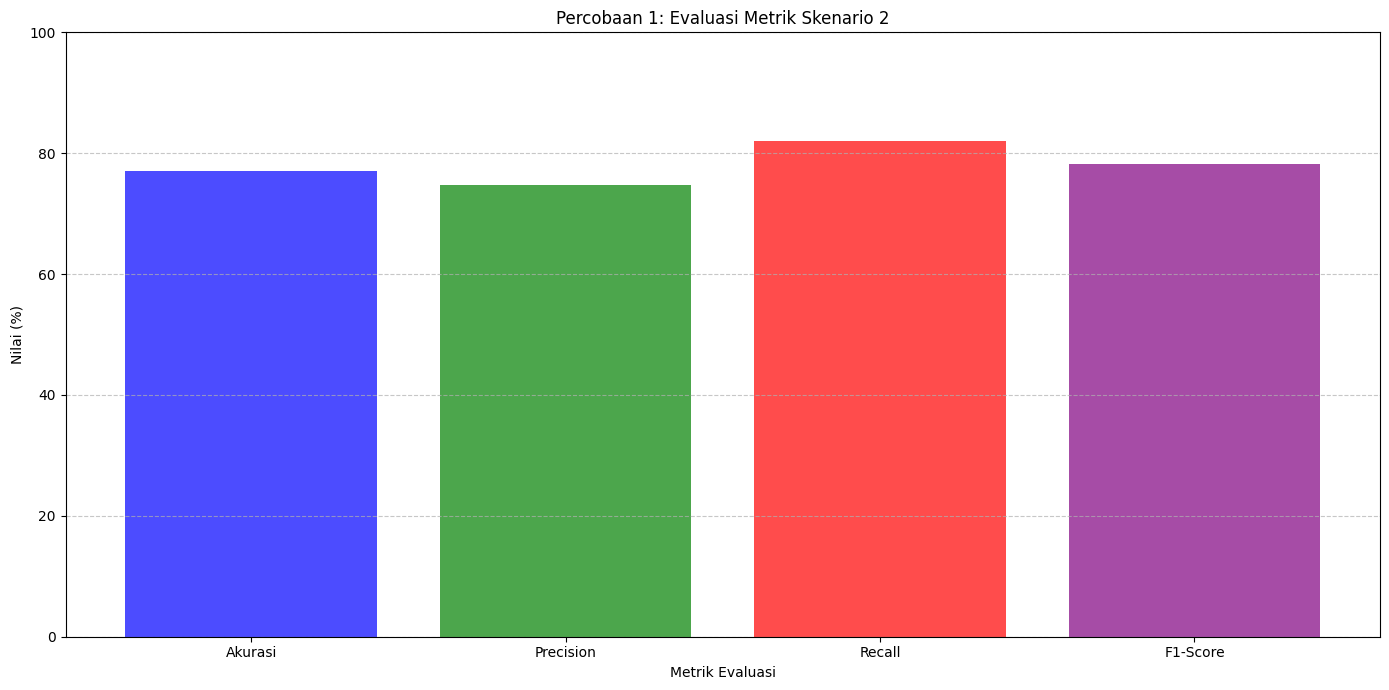

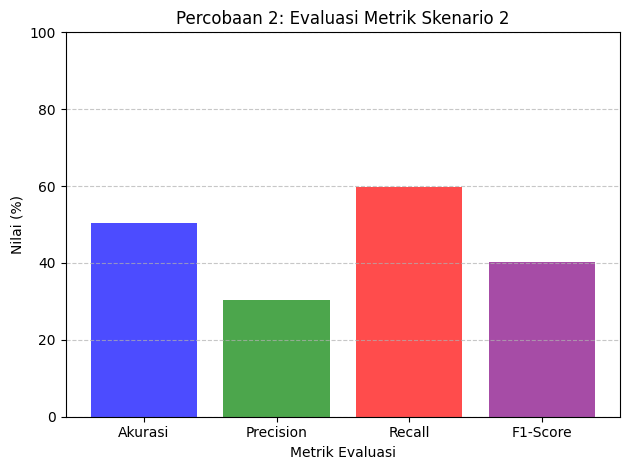

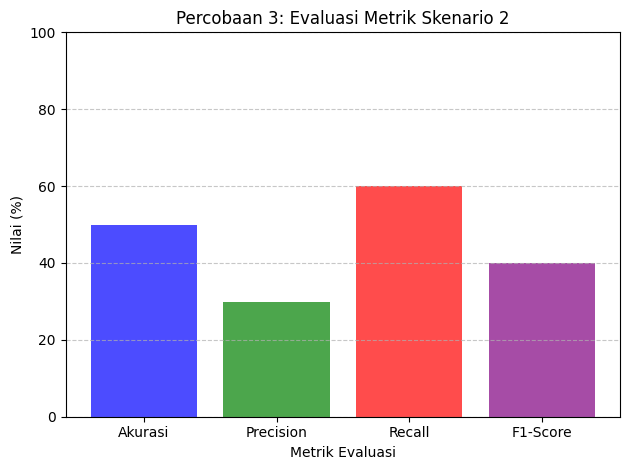

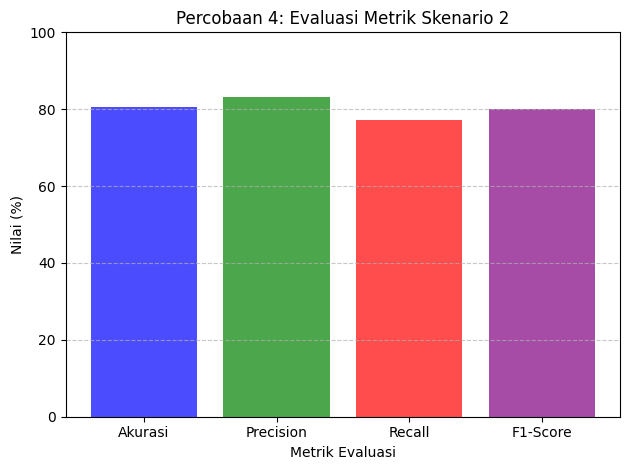

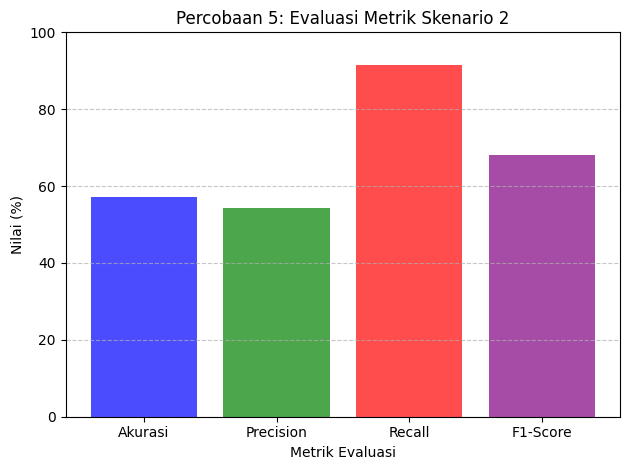

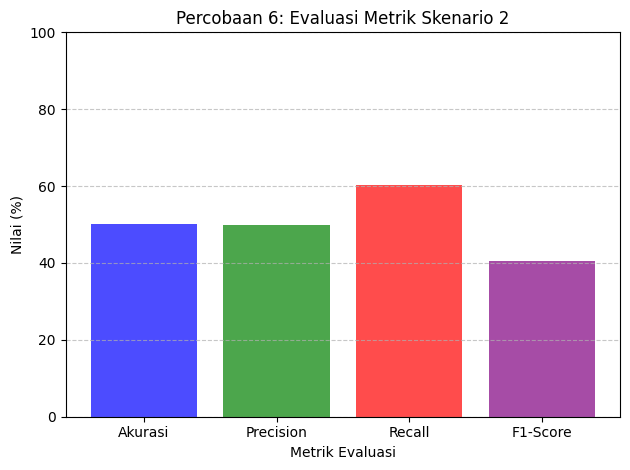

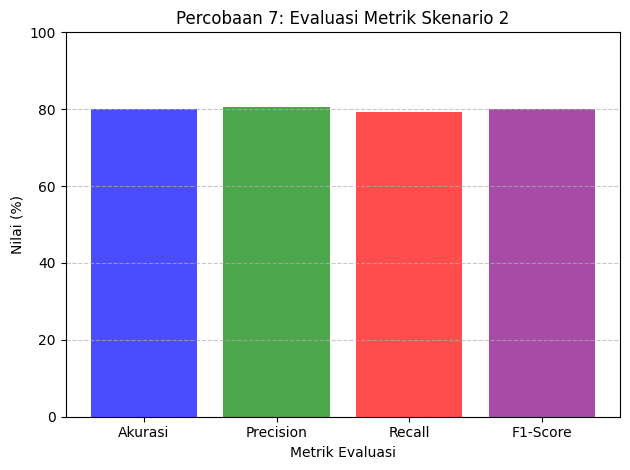

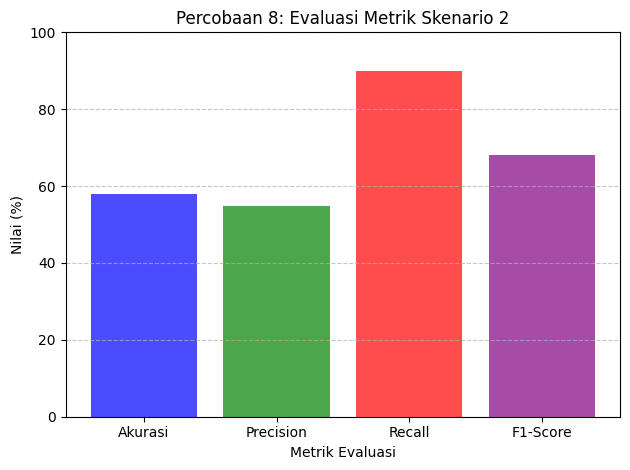

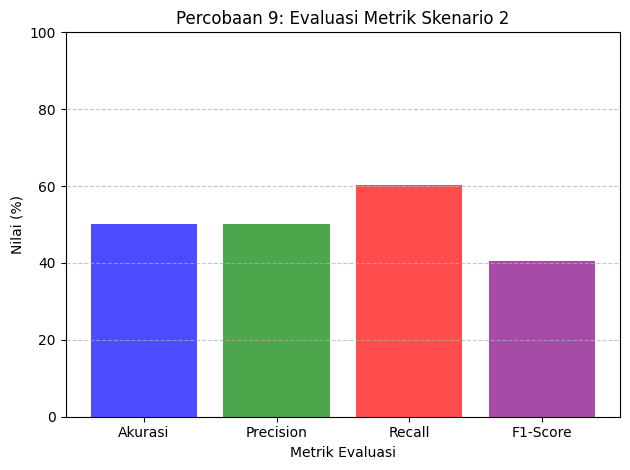

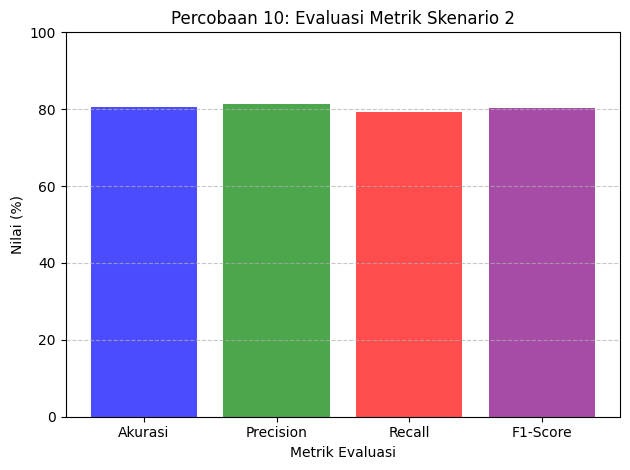

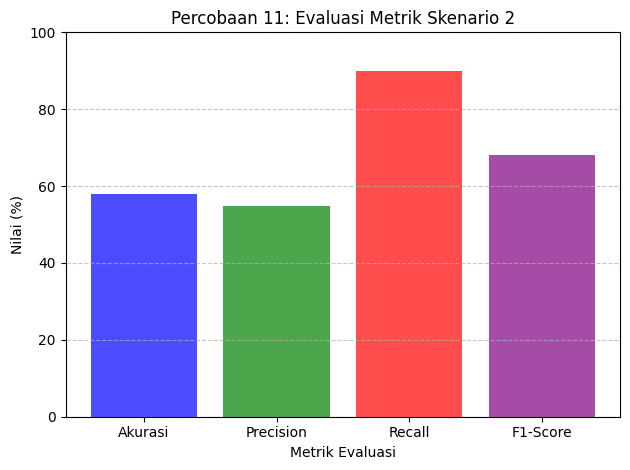

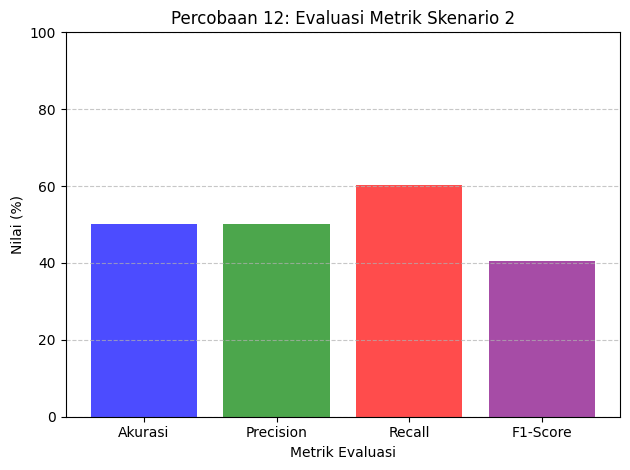

In [40]:
plt.figure(figsize=(14, 7))

for i in range(len(formatted_results)):
    metrics = [
        formatted_results.loc[i, 'Akurasi'],
        formatted_results.loc[i, 'Precision'],
        formatted_results.loc[i, 'Recall'],
        formatted_results.loc[i, 'F1-Score']
    ]

    labels = ['Akurasi', 'Precision', 'Recall', 'F1-Score']
    colors = ['blue', 'green', 'red', 'purple']

    plt.bar(labels, metrics, color=colors, alpha=0.7)
    plt.title(f"Percobaan {i+1}: Evaluasi Metrik Skenario 2")
    plt.xlabel("Metrik Evaluasi")
    plt.ylabel("Nilai (%)")
    plt.ylim(0, 100)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# SKENARIO 3

## SPLIT DATA

In [41]:
test_size = 0.3
print(f"=== Skenario 3: Split Data 70:30 ===")

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=test_size, random_state=42, stratify=y)

print("\nShape of training data:", X_train.shape)
print("Shape of testing data:", X_test.shape)

train_class_counts = y_train.value_counts()
test_class_counts = y_test.value_counts()

print("\nJumlah Data Training dan Testing berdasarkan Kelas:")
print(f"{'Kelas':<15}{'Jumlah Data Training':<20}{'Jumlah Data Testing'}")
print(f"Infected:       {train_class_counts.get(1, 0):<20}{test_class_counts.get(1, 0)}")
print(f"Non-Infected:   {train_class_counts.get(0, 0):<20}{test_class_counts.get(0, 0)}")


=== Skenario 3: Split Data 70:30 ===

Shape of training data: (1497, 22)
Shape of testing data: (642, 22)

Jumlah Data Training dan Testing berdasarkan Kelas:
Kelas          Jumlah Data TrainingJumlah Data Testing
Infected:       365                 156
Non-Infected:   1132                486


## PCA

Eigenvalue

In [42]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print("\nEigenvalues:")
print(pca.explained_variance_)


Eigenvalues:
[3.59580759 2.24691582 2.0185469  1.87154236 1.66109022 1.34121123
 1.12092759 1.01982149 1.00316386 0.96587811 0.88120099 0.84161684
 0.74855091 0.66489556 0.55929107 0.44865725 0.39698783 0.21711181
 0.19081849 0.14789889 0.10336106 0.0451002 ]


Variance Ratio

In [43]:
print("\nExplained variance ratio:")
print(pca.explained_variance_ratio_)

explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(explained_variance_ratio >= 0.95) + 1
print(f"\nNumber of components to retain 95% variance: {num_components}")

pca = PCA(n_components=num_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


Explained variance ratio:
[0.16277696 0.1017146  0.09137667 0.08472199 0.07519513 0.06071468
 0.05074276 0.04616583 0.04541176 0.04372389 0.03989068 0.03809877
 0.03388581 0.03009885 0.02531829 0.02031006 0.01797106 0.00982833
 0.00863807 0.00669517 0.004679   0.00204162]

Number of components to retain 95% variance: 16


Principal Component (Data Training)

In [44]:
pd.DataFrame(X_train_pca).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-2.008795,-1.374471,-1.255959,1.588414,-0.162329,-0.011029,0.533714,-1.122244,2.060990,0.531312,0.611522,-0.994823,-0.471526,0.252394,-0.098327,-0.112851
1,-1.819306,-1.231499,0.576377,0.783569,1.451587,-1.041123,-0.241787,0.666400,0.107568,-1.549649,-1.975786,1.086240,-0.525750,2.378718,0.627832,0.163981
2,-2.257306,-0.072864,0.271511,1.375709,-1.746477,-0.201105,-0.107878,-0.089039,0.735093,0.272828,0.260275,0.096865,0.005281,-0.379503,-0.087753,-0.328754
3,-1.945967,-1.139868,-1.219789,0.916152,0.774616,-0.373572,-0.580846,1.824852,0.650865,0.760487,0.581556,1.490824,1.600374,0.511299,-0.309448,1.108854
4,2.103730,-0.323666,-0.666245,0.712752,1.272913,1.092982,-0.366987,0.349316,-0.491197,-0.312200,-0.812371,-0.402504,0.338392,-0.933262,0.162717,0.912442


## UNDERSAMPLING

In [45]:
rus = RandomUnderSampler(random_state=42)
X_train_balanced, y_train_balanced = rus.fit_resample(X_train_pca, y_train)

print("\nShape of training data after undersampling:", X_train_balanced.shape)
print("Class distribution after undersampling:")
print(pd.Series(y_train_balanced).value_counts())

undersampled_train_data = pd.DataFrame(X_train_balanced, columns=[f'PC{i+1}' for i in range(X_train_balanced.shape[1])])
undersampled_train_data['infected'] = y_train_balanced.values
undersampled_train_data.to_csv('data_training_skenario3.csv', index=False)

test_data_pca = pd.DataFrame(X_test_pca, columns=[f'PC{i+1}' for i in range(X_test_pca.shape[1])])
test_data_pca['infected'] = y_test.values
test_data_pca.to_csv('data_testing_skenario3.csv', index=False)


Shape of training data after undersampling: (730, 16)
Class distribution after undersampling:
infected
0    365
1    365
Name: count, dtype: int64


## SVM

In [46]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10]}
grid_search = GridSearchCV(
    SVC(kernel='rbf', random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring=['accuracy', 'precision', 'recall', 'f1'],
    refit='accuracy'
)

grid_search.fit(X_train_balanced, y_train_balanced)

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10]},
             refit='accuracy',
             scoring=['accuracy', 'precision', 'recall', 'f1'])

Rata-rata Evaluasi Berdasarkan Nilai C

In [47]:
results = pd.DataFrame(grid_search.cv_results_)

if {'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1'}.issubset(results.columns):
    avg_metrics_by_C = results.groupby('param_C').agg({
        'mean_test_accuracy': 'mean',
        'mean_test_precision': 'mean',
        'mean_test_recall': 'mean',
        'mean_test_f1': 'mean'
    })
    for C, row in avg_metrics_by_C.iterrows():
        print(f"C = {C:.1f}: "
              f"Akurasi = {row['mean_test_accuracy'] * 100:.2f}%, "
              f"Precision = {row['mean_test_precision'] * 100:.2f}%, "
              f"Recall = {row['mean_test_recall'] * 100:.2f}%, "
              f"F1 Score = {row['mean_test_f1'] * 100:.2f}%")
else:
    print("Kolom yang diperlukan untuk evaluasi rata-rata berdasarkan nilai C tidak ditemukan.")

C = 0.1: Akurasi = 57.90%, Precision = 49.12%, Recall = 82.19%, F1 Score = 60.93%
C = 1.0: Akurasi = 63.88%, Precision = 63.00%, Recall = 77.90%, F1 Score = 63.90%
C = 10.0: Akurasi = 63.61%, Precision = 62.47%, Recall = 76.71%, F1 Score = 63.34%
C = 100.0: Akurasi = 62.97%, Precision = 61.83%, Recall = 75.98%, F1 Score = 62.67%


Rata-rata Evaluasi Berdasarkan Nilai Gamma

In [48]:
if {'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1'}.issubset(results.columns):
    avg_metrics_by_gamma = results.groupby('param_gamma').agg({
        'mean_test_accuracy': 'mean',
        'mean_test_precision': 'mean',
        'mean_test_recall': 'mean',
        'mean_test_f1': 'mean'
    })
    for gamma, row in avg_metrics_by_gamma.iterrows():
        print(f"Gamma (γ) = {gamma:.2f}: "
              f"Akurasi = {row['mean_test_accuracy'] * 100:.2f}%, "
              f"Precision = {row['mean_test_precision'] * 100:.2f}%, "
              f"Recall = {row['mean_test_recall'] * 100:.2f}%, "
              f"F1 Score = {row['mean_test_f1'] * 100:.2f}%")
else:
    print("Kolom yang diperlukan untuk evaluasi rata-rata berdasarkan nilai Gamma tidak ditemukan.")

Gamma (γ) = 0.10: Akurasi = 77.02%, Precision = 76.72%, Recall = 80.00%, F1 Score = 77.85%
Gamma (γ) = 1.00: Akurasi = 59.08%, Precision = 55.56%, Recall = 94.59%, F1 Score = 69.88%
Gamma (γ) = 10.00: Akurasi = 50.17%, Precision = 45.03%, Recall = 60.00%, F1 Score = 40.39%


Hasil Evaluasi Per Kombinasi Hyperparameter

In [49]:
formatted_results = results[['param_C', 'param_gamma', 'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1']].copy()
formatted_results.columns = ['C (C)', 'Gamma (γ)', 'Akurasi', 'Precision', 'Recall', 'F1-Score']
formatted_results[['Akurasi', 'Precision', 'Recall', 'F1-Score']] *= 100

print(tabulate(formatted_results, headers='keys', tablefmt='grid', showindex=False))

+---------+-------------+-----------+-------------+----------+------------+
|   C (C) |   Gamma (γ) |   Akurasi |   Precision |   Recall |   F1-Score |
+=========+=============+===========+=============+==========+============+
|     0.1 |         0.1 |   70.5479 |     65.7062 |  86.8493 |    74.7435 |
+---------+-------------+-----------+-------------+----------+------------+
|     0.1 |         1   |   53.1507 |     51.6604 |  99.726  |    68.0529 |
+---------+-------------+-----------+-------------+----------+------------+
|     0.1 |        10   |   50      |     30      |  60      |    40      |
+---------+-------------+-----------+-------------+----------+------------+
|     1   |         0.1 |   80.8219 |     82.5376 |  78.6301 |    80.3934 |
+---------+-------------+-----------+-------------+----------+------------+
|     1   |         1   |   60.6849 |     56.4723 |  95.0685 |    70.8148 |
+---------+-------------+-----------+-------------+----------+------------+
|     1   | 

Rata-rata Evaluasi Model

In [50]:
avg_accuracy = results['mean_test_accuracy'].mean()
avg_precision = results['mean_test_precision'].mean()
avg_recall = results['mean_test_recall'].mean()
avg_f1 = results['mean_test_f1'].mean()

print(f"Akurasi: {avg_accuracy * 100:.2f}%, Precision: {avg_precision * 100:.2f}%, Recall: {avg_recall * 100:.2f}%, F1-Score: {avg_f1 * 100:.2f}%")

Akurasi: 62.09%, Precision: 59.11%, Recall: 78.20%, F1-Score: 62.71%


Hasil Training Skenario 1

In [51]:
best_accuracy = grid_search.best_score_ * 100
best_precision = results['mean_test_precision'][grid_search.best_index_] * 100
best_recall = results['mean_test_recall'][grid_search.best_index_] * 100
best_f1 = results['mean_test_f1'][grid_search.best_index_] * 100

skenario_3_results = {
    'Skenario': '70:30',
    'Accuracy': f"{best_accuracy:.2f}%",
    'Precision': f"{best_precision:.2f}%",
    'Recall': f"{best_recall:.2f}%",
    'F1-Score': f"{best_f1:.2f}%"
}

print(skenario_3_results)

{'Skenario': '70:30', 'Accuracy': '80.82%', 'Precision': '82.54%', 'Recall': '78.63%', 'F1-Score': '80.39%'}


Parameter Terbaik Berdasarkan Data Testing

In [52]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(best_params)

{'C': 1, 'gamma': 0.1}


Akurasi Model Terbaik pada Data Testing

In [53]:
y_pred_test = best_model.predict(X_test_pca)
accuracy_test = accuracy_score(y_test, y_pred_test) * 100
precision_test = precision_score(y_test, y_pred_test, zero_division=1) * 100
recall_test = recall_score(y_test, y_pred_test) * 100
f1_test = f1_score(y_test, y_pred_test) * 100

print(f"Accuracy: {accuracy_test:.2f}%, Precision: {precision_test:.2f}%, Recall: {recall_test:.2f}%, F1 Score: {f1_test:.2f}%")

Accuracy: 81.93%, Precision: 59.43%, Recall: 80.77%, F1 Score: 68.48%


## VISUALISASI DATA

In [54]:
y_pred_cv = cross_val_predict(grid_search.best_estimator_, X_train_balanced, y_train_balanced, cv=5)
conf_matrix_cv = confusion_matrix(y_train_balanced, y_pred_cv)

Confusion Matrix

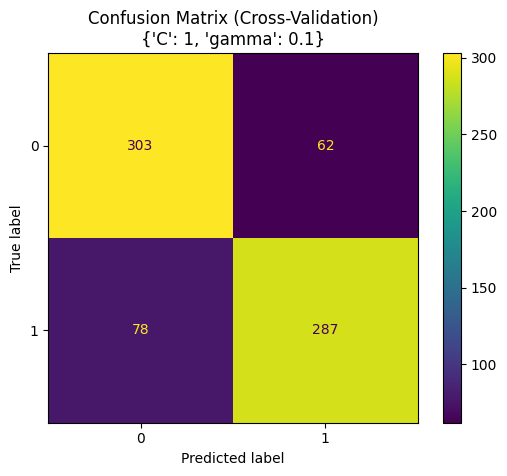

In [55]:
ConfusionMatrixDisplay(confusion_matrix=conf_matrix_cv, display_labels=best_model.classes_).plot()
plt.title(f"Confusion Matrix (Cross-Validation)\n{best_params}")
plt.show()

Confusion Matrix Untuk Model Terbaik Pada Data Testing

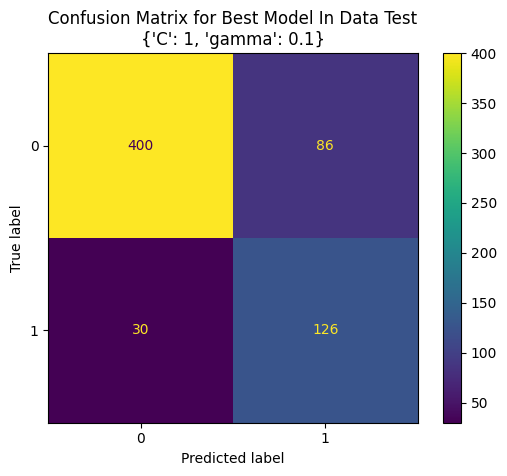

In [56]:
conf_matrix = confusion_matrix(y_test, y_pred_test)
ConfusionMatrixDisplay(conf_matrix, display_labels=best_model.classes_).plot()
plt.title(f"Confusion Matrix for Best Model In Data Test\n{best_params}")
plt.show()

Akurasi pada Setiap Percobaan Tuning Parameter

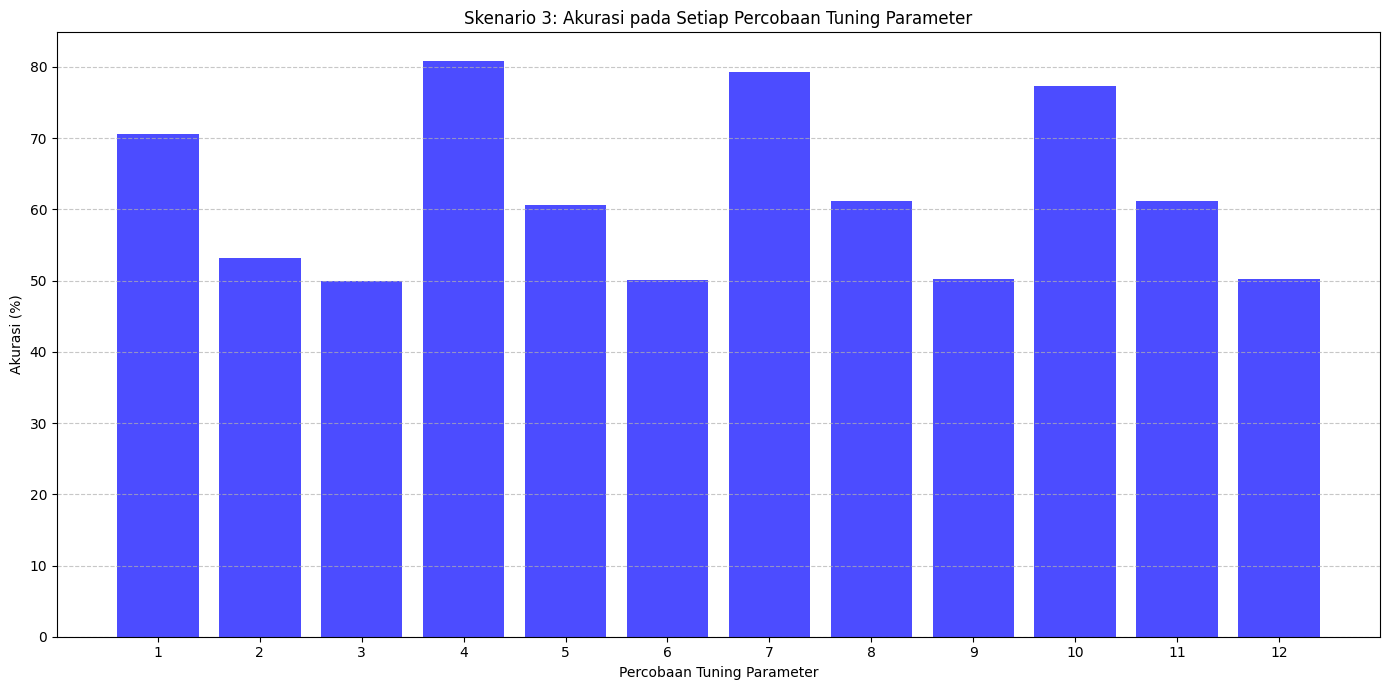

In [57]:
plt.figure(figsize=(14, 7))
plt.bar(range(1, len(formatted_results) + 1), formatted_results['Akurasi'], color='blue', alpha=0.7)
plt.xticks(range(1, len(formatted_results) + 1), range(1, len(formatted_results) + 1))
plt.title("Skenario 3: Akurasi pada Setiap Percobaan Tuning Parameter")
plt.xlabel("Percobaan Tuning Parameter")
plt.ylabel("Akurasi (%)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Presisi pada Setiap Percobaan Tuning Parameter

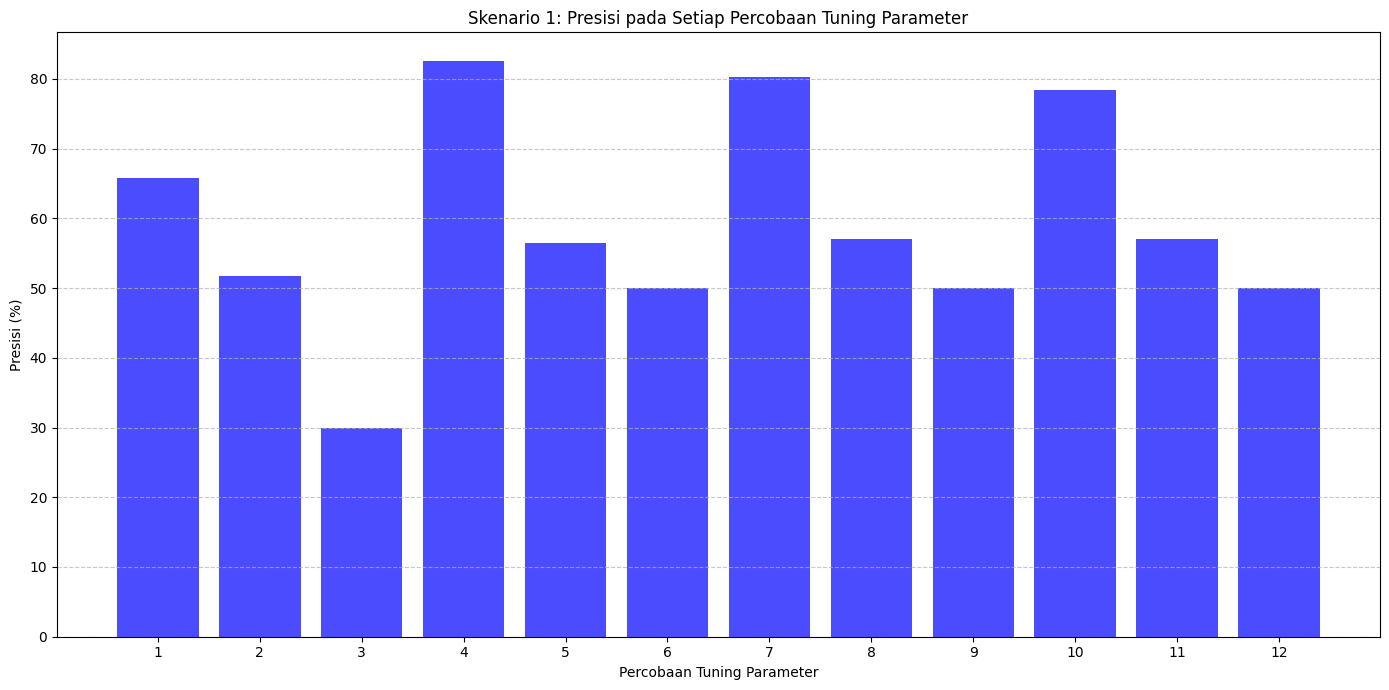

In [69]:
plt.figure(figsize=(14, 7))
plt.bar(range(1, len(formatted_results) + 1), formatted_results['Precision'], color='blue', alpha=0.7)
plt.xticks(range(1, len(formatted_results) + 1), range(1, len(formatted_results) + 1))
plt.title("Skenario 1: Presisi pada Setiap Percobaan Tuning Parameter")
plt.xlabel("Percobaan Tuning Parameter")
plt.ylabel("Presisi (%)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Recall pada Setiap Percobaan Tuning Parameter

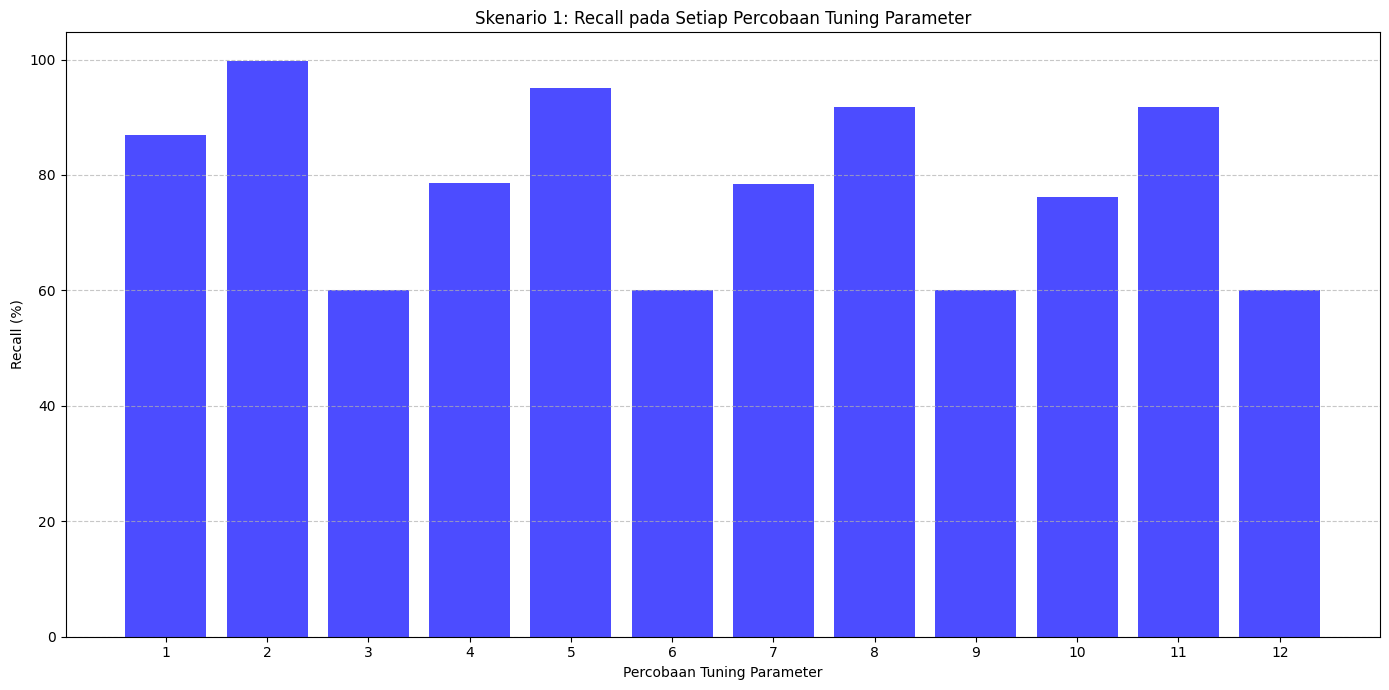

In [70]:
plt.figure(figsize=(14, 7))
plt.bar(range(1, len(formatted_results) + 1), formatted_results['Recall'], color='blue', alpha=0.7)
plt.xticks(range(1, len(formatted_results) + 1), range(1, len(formatted_results) + 1))
plt.title("Skenario 1: Recall pada Setiap Percobaan Tuning Parameter")
plt.xlabel("Percobaan Tuning Parameter")
plt.ylabel("Recall (%)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

F1-Score pada Setiap Percobaan Tuning Parameter

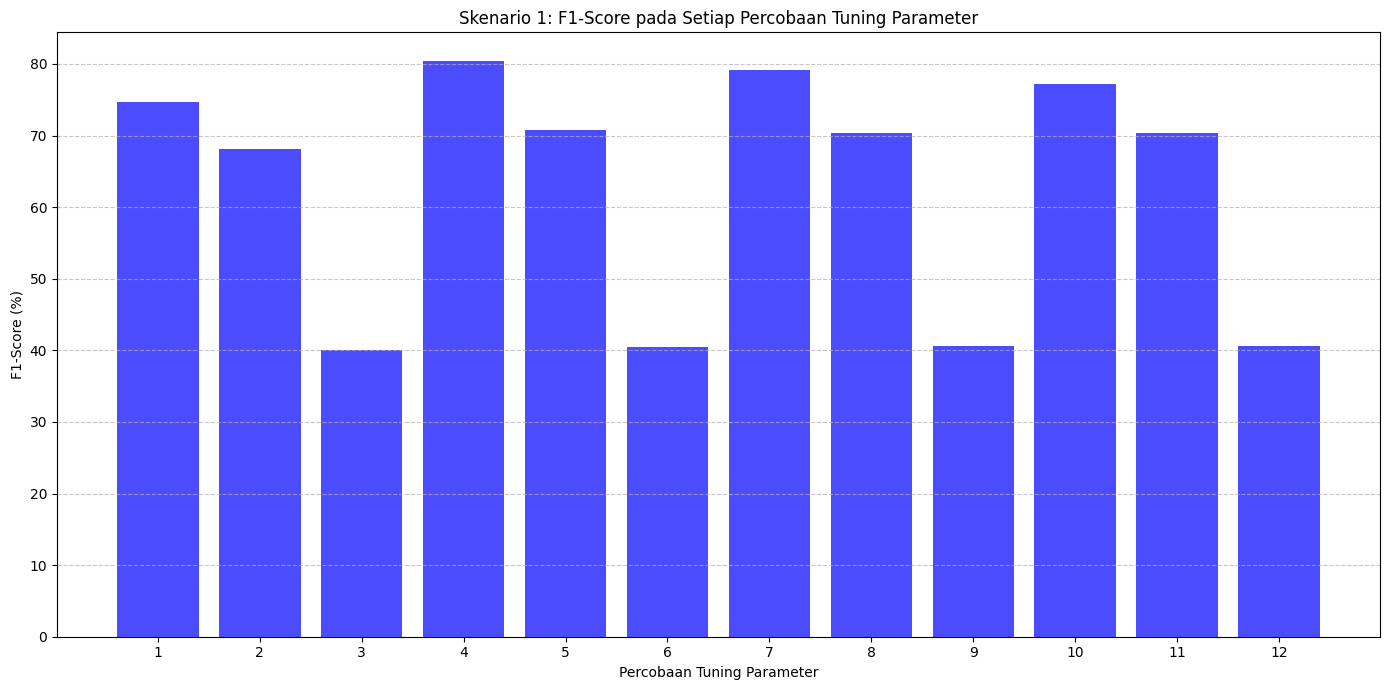

In [71]:
plt.figure(figsize=(14, 7))
plt.bar(range(1, len(formatted_results) + 1), formatted_results['F1-Score'], color='blue', alpha=0.7)
plt.xticks(range(1, len(formatted_results) + 1), range(1, len(formatted_results) + 1))
plt.title("Skenario 1: F1-Score pada Setiap Percobaan Tuning Parameter")
plt.xlabel("Percobaan Tuning Parameter")
plt.ylabel("F1-Score (%)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Evaluasi Metrik Tiap Percobaan Tuning Parameter

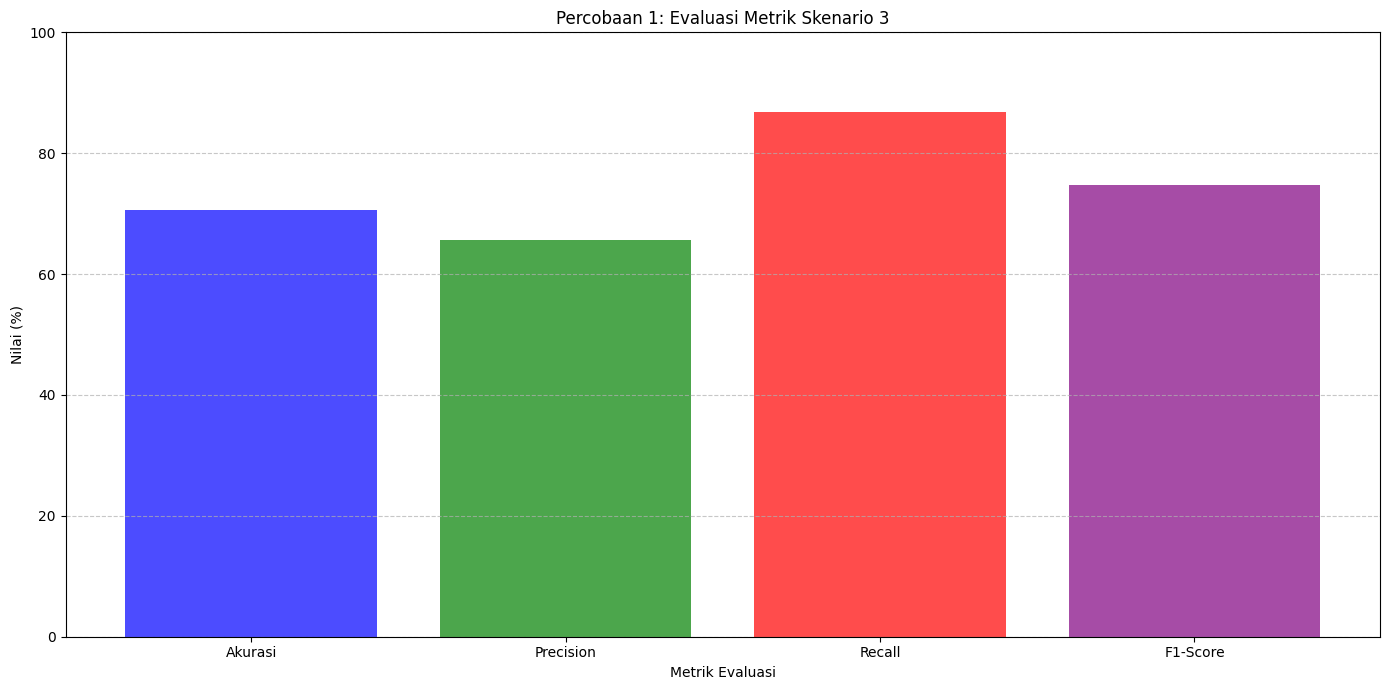

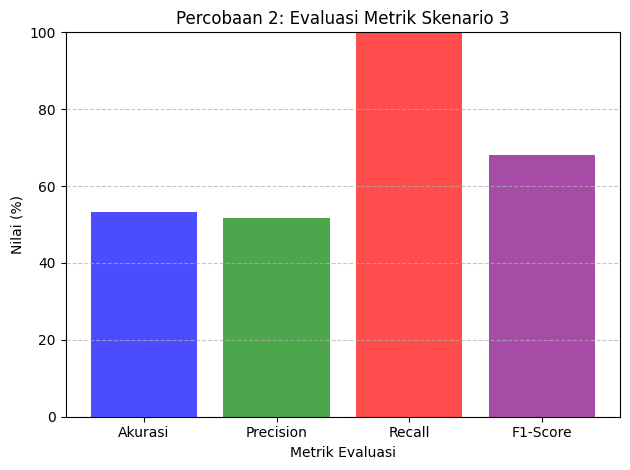

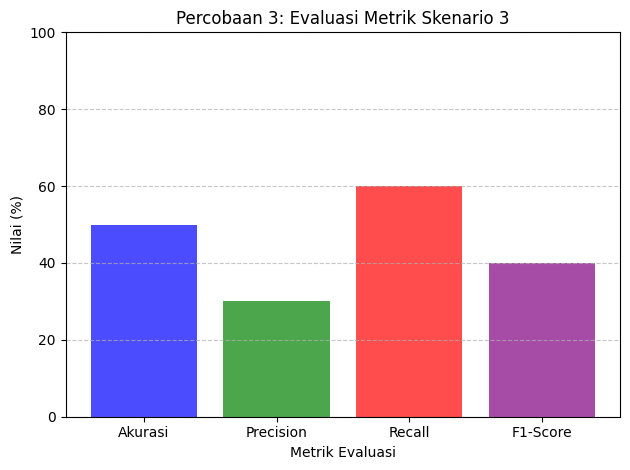

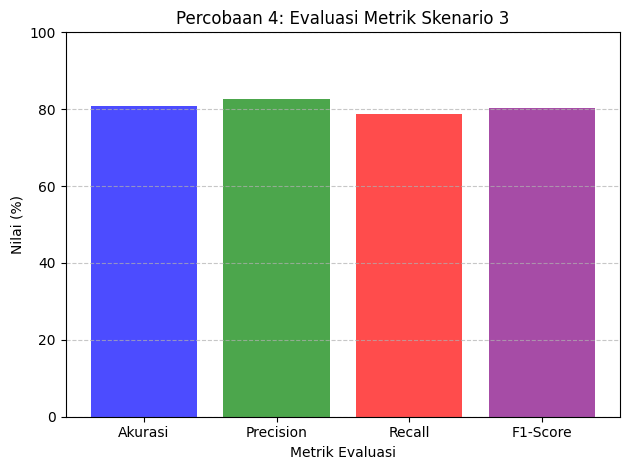

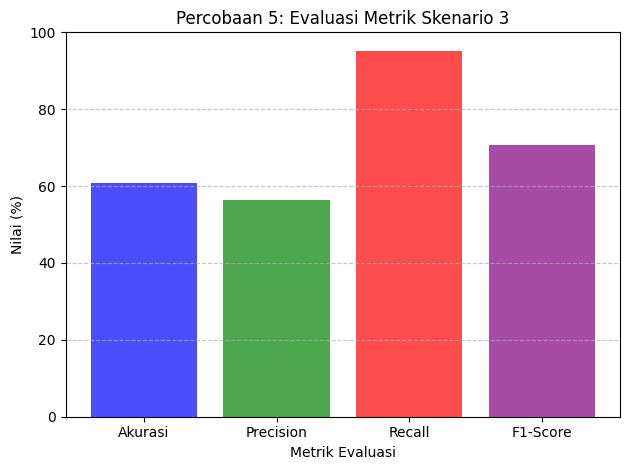

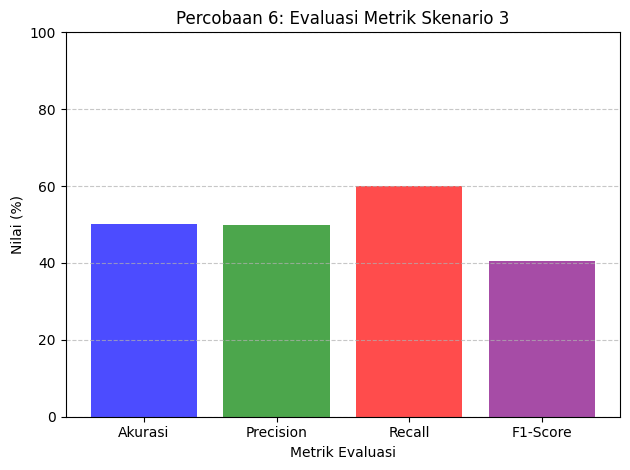

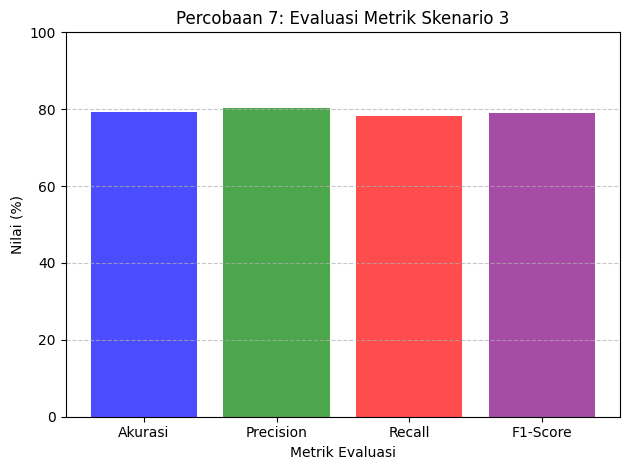

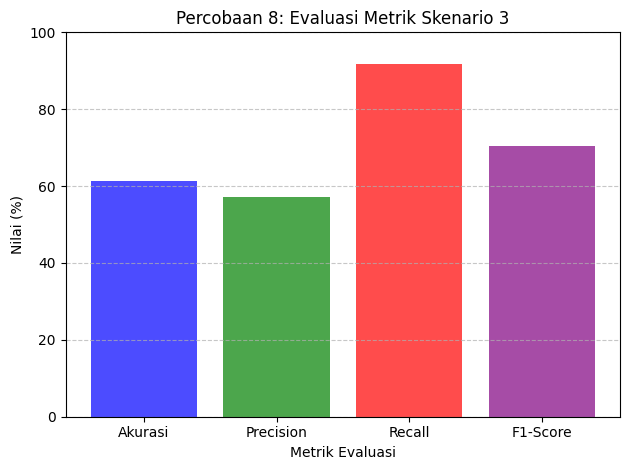

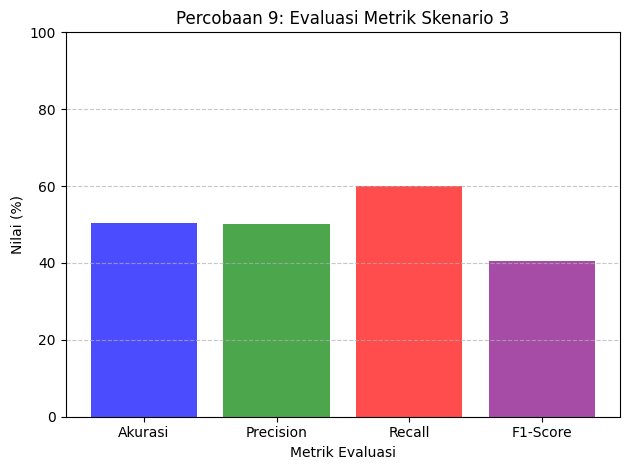

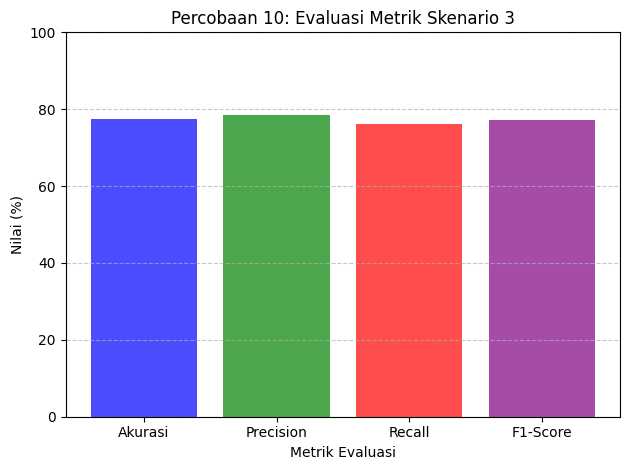

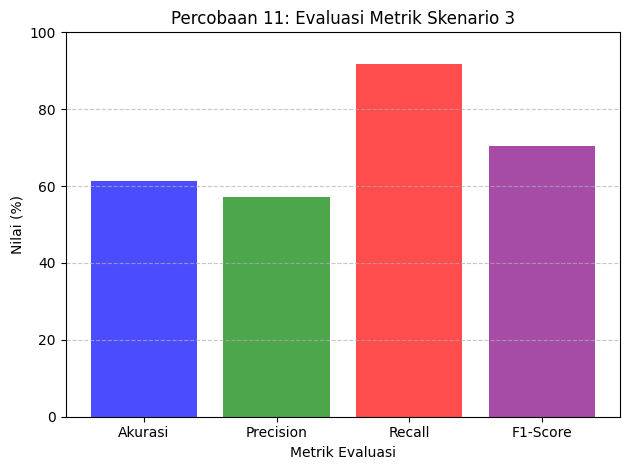

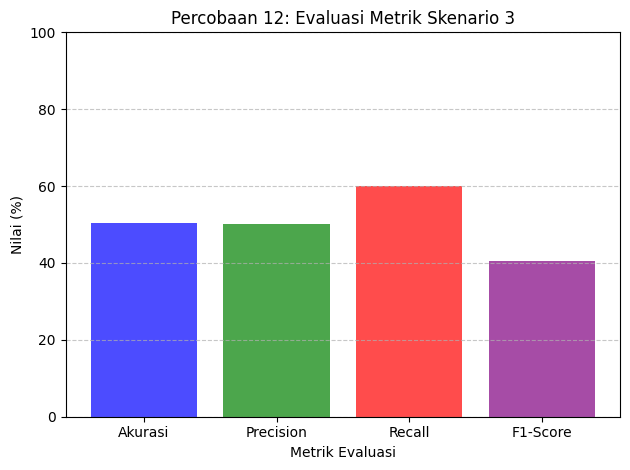

In [58]:
plt.figure(figsize=(14, 7))

for i in range(len(formatted_results)):
    metrics = [
        formatted_results.loc[i, 'Akurasi'],
        formatted_results.loc[i, 'Precision'],
        formatted_results.loc[i, 'Recall'],
        formatted_results.loc[i, 'F1-Score']
    ]

    labels = ['Akurasi', 'Precision', 'Recall', 'F1-Score']
    colors = ['blue', 'green', 'red', 'purple']

    plt.bar(labels, metrics, color=colors, alpha=0.7)
    plt.title(f"Percobaan {i+1}: Evaluasi Metrik Skenario 3")
    plt.xlabel("Metrik Evaluasi")
    plt.ylabel("Nilai (%)")
    plt.ylim(0, 100)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# HASIL EVALUASI SEMUA SKENARIO

In [59]:
results_df = pd.DataFrame([
    {
        'Skenario': '90:10',
        'Accuracy': skenario_1_results.get('Accuracy', '0%'),
        'Precision': skenario_1_results.get('Precision', '0%'),
        'Recall': skenario_1_results.get('Recall', '0%'),
        'F1-Score': skenario_1_results.get('F1-Score', '0%')
    },
    {
        'Skenario': '80:20',
        'Accuracy': skenario_2_results.get('Accuracy', '0%'),
        'Precision': skenario_2_results.get('Precision', '0%'),
        'Recall': skenario_2_results.get('Recall', '0%'),
        'F1-Score': skenario_2_results.get('F1-Score', '0%')
    },
    {
        'Skenario': '70:30',
        'Accuracy': skenario_3_results.get('Accuracy', '0%'),
        'Precision': skenario_3_results.get('Precision', '0%'),
        'Recall': skenario_3_results.get('Recall', '0%'),
        'F1-Score': skenario_3_results.get('F1-Score', '0%')
    }
])

results_df['Accuracy'] = results_df['Accuracy'].astype(str).str.rstrip('%').astype(float)
results_df['Precision'] = results_df['Precision'].astype(str).str.rstrip('%').astype(float)
results_df['Recall'] = results_df['Recall'].astype(str).str.rstrip('%').astype(float)
results_df['F1-Score'] = results_df['F1-Score'].astype(str).str.rstrip('%').astype(float)

In [60]:
print("\n=== Hasil Evaluasi Semua Skenario ===")
print(results_df)


=== Hasil Evaluasi Semua Skenario ===
  Skenario  Accuracy  Precision  Recall  F1-Score
0    90:10     80.92      83.24   77.82     80.32
1    80:20     80.70      83.13   77.21     79.97
2    70:30     80.82      82.54   78.63     80.39


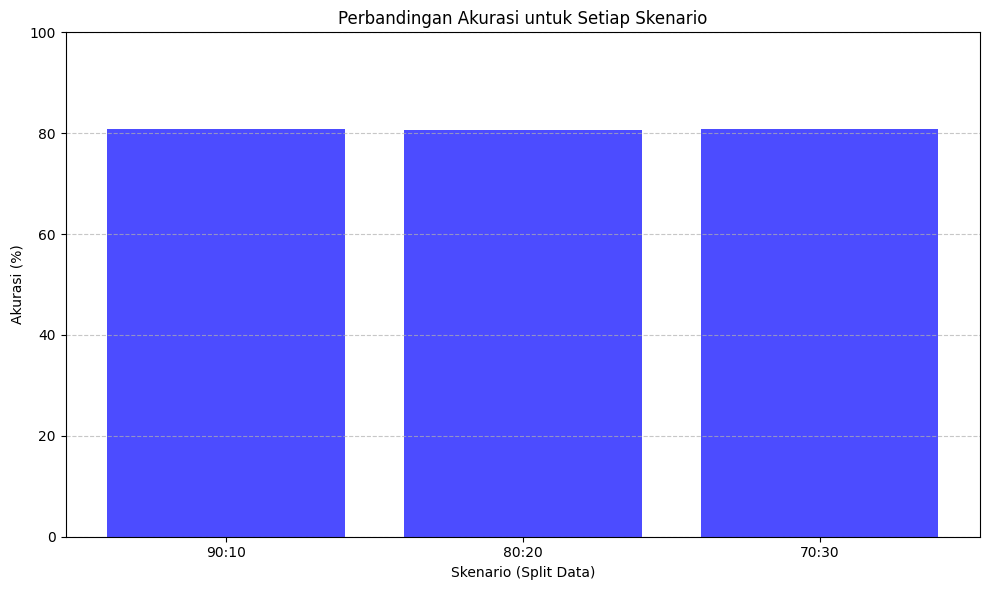

In [61]:
plt.figure(figsize=(10, 6))
plt.bar(results_df['Skenario'], results_df['Accuracy'], color='blue', alpha=0.7)

plt.title("Perbandingan Akurasi untuk Setiap Skenario")
plt.xlabel("Skenario (Split Data)")
plt.ylabel("Akurasi (%)")
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()